# Overview

In a few months time, I'm going to become a dad for the first time and with that, all the usual concerns about long-term financial security have come to the forefront of my mind. For some time, I've heard about the option of tax-free investments but thus far have been slow to look into them and the savings potential they offer my family.

This project aims to use the power of data science to: generate millions of combinations of investments that abide by the tax-free savings rules and then: analyse those investments to understand how one can optimise them for specific savings goals, such as a child's future education or wedding, retirement plan or just saving for a rainy day.

There are numerous online calculators where one can play around with individual lump sum amounts, monthly contributions and risk tolerances, however using these tools is cumbersome as you can't simulate every possible combination. This means that don't know if you are missing out on the "best" combination that would maximise your investment. It's also useful to have a general appreciation for how these parameters affect your investment, which these tools don't offer.

With this post, I'd like to provide a general understanding of how these parameters affect your investment and then bring it all together by showing different options for savings specific goal amounts, namely R250K, R500K, R1M, R2M, R5M and R10M. I chose these amounts because they represent goals that range from medium-term expenses such as paying for a wedding, all the way to retirement and even financial freedom.

We'll look at what can and can't be achieved with tax-free investments and at the end of the analysis I'll provide a free pdf report (no email signup) containing all the graphs in the article. You can use this as an input to your investment decision when comparing products from different financial institutions. Knowing what's possible will make the comparisons more precise.

If you would like to reproduce or extend the analysis, you can access the project source code [here](https://github.com/dorond/tax-free-investment-analysis)

# What are Tax-free Investments?

From 1 March 2015, it become possible to invest in a class of products whose returns are not subject to any form of income tax, divident tax or capital gains tax. We refer to these as Tax-free investment products. They can be packaged together and provided by licensed banks, long-term insurers, mutual and co-operative banks and government. 

> **Their primary goal is to encourage and incentivise South Africa's to save.**

There are a few rules surrounding tax-free investments:

- As of 1 March 2017, you can contribute a **maximum of R33,000** per tax year. Any portion of unused annual limit is forfeited in that year. Each new year this limit is reset to R33,000.
- There is a life time limit of **R500,000 per person**.
- If a person exceeds the limits, there is a penalty of 40% of the excess amount.  

> Example: Taxpayer X invests R35,000 in a year – this exceeds the annual limit by R2,000, 40% of R2,000 = R800 must be paid to SARS. This penalty is added to the normal tax payable on assessment.

- You can have more than one tax free investment, however, you are limited to the annual limits per tax year and lifetime limits. This means you can invest, for example, R11,000 in Old Mutual, R11,000 in Investec and R11,000 in Absa.  
- Parents can invest on behalf of their minor child.  The minor child will use his/her own annual or lifetime limits. 

> Example: A family of four could each have an account allowing a total of R33,000 x 4 = R132,000 to be invested in a given year or R2M over a lifetime.

- When returns on investment are added to the amount contributed, the balance can exceed both the annual and/or lifetime limit.  The re-investment of these returns within the account does not affect the annual or lifetime limit.

> Example: If you invest R33,000 for the year and receive a return of investment of R5,000, which you have chosen to re-invest, the total amount in the account will be R38,000. The following year, you will still be able to invest your full R33,000 for the year.

- If the returns are withdrawn and the same amount is reinvested, that amount is regarded as a new contribution and impacts on both the annual and lifetime limits. Withdrawals made cannot be replaced, be it returns or capital.
- Tax free investment accounts cannot be used as transactional accounts, for debit or stop orders or for ATM transactions.
- Only new accounts will qualify as the idea is to encourage new savings, in other words, existing accounts may not be converted.

# Assumptions & Caveats

With this type of analysis, there has to be some assumptions made and limitations in place:

- All data generated assumes that the lump sum and monthly contributions will remain the same throughout the entire life of the investment. Of course in real life, one might change their monthly contribution or add additional lump-sum payments when they have the funds. The fund you invest in might also increase your monthly contribution automatically each year to keep up with inflation. In this first version of the analysis, I won't consider these cases but in a future version I will.
- We are going to look at investment options that cover 5 risk categories namely low, low-medium, medium, medium-high and high. What represents these different risk categories is the expected return one can receive for the type of investment. I will be using values which I've borrowed from https://savetaxfree.co.za. I've also used their tax-free investment calculator to ensure the investments I generate are 100% accurate. 
- The **_BIG_** caveat here is that these are idealised investments, i.e. if a high risk investment gives you an expected return of 18% per year, then you'd get this every year without fail. Of course this is completely unrealistic because real markets fluctuate and you may get more or less than this return in any given time period. As the risk goes up, so does the risk of not getting that return, so while this analysis will be accurate in the potential idealised value one **_could_** earn, it will be slightly inaccurate in the value one **_will_** earn. In a future version, I would like to inject random noise that represents real market fluctuations.
- We'll assume interest is compunded monthly at the end of each month.
- We'll assume returns are reinvested into the fund without withdrawal, until the maturity date.

Risk | Rate | Description
---| --- | --- |
Low | 7.21% | Interest-bearing money market funds
Low-medium | 9.93% | Multi-asset low equity funds
Medium | 12.18% | Multi-asset options using average of medium equity and high equity funds
Medium-high | 16.59% | Top 40 equity funds
High | 18% | Small and mid-cap equity funds

# Data Generation Process

Most data science projects use existing data, however it's entirely possible to generate your own if it accurately represents the underlying situation. In the case of investments like these, with well known future value calculation parameteres, the data can be generated. 

To do so, I first created investment combinations using:

- Time-horizon's that span 1 to 50 years into the future.
- Lump sum's from R0 to R30,000 in R250 increments.
- Monthly contributions from R0 to R5,000 in R50 increments.
- Risks using the 5 mentioned previously.

Then each possible combination of these options was used to generate a future value calculation of the investment.

This gave us **3,055,250** possible investments, however not all of them are valid as they exceed either the R33,000 per year limit or the R500,000 lifetime limit.

After writing an algorithm to weed out the invalid options, we are left with **744,425** investments, plenty for us to analyse.

In [1]:
import numpy as np
import pandas as pd

time_horizons = np.array([i for i in range(1, 51)])
return_rates = np.array([0.0721, 0.0993, 0.1218, 0.1659, 0.18])
lump_sums = np.array([i for i in range(0, 30250, 250)])
monthly_contribs = np.array([i for i in range(0, 5050, 50)])

In [2]:
lump_sums

array([    0,   250,   500,   750,  1000,  1250,  1500,  1750,  2000,
        2250,  2500,  2750,  3000,  3250,  3500,  3750,  4000,  4250,
        4500,  4750,  5000,  5250,  5500,  5750,  6000,  6250,  6500,
        6750,  7000,  7250,  7500,  7750,  8000,  8250,  8500,  8750,
        9000,  9250,  9500,  9750, 10000, 10250, 10500, 10750, 11000,
       11250, 11500, 11750, 12000, 12250, 12500, 12750, 13000, 13250,
       13500, 13750, 14000, 14250, 14500, 14750, 15000, 15250, 15500,
       15750, 16000, 16250, 16500, 16750, 17000, 17250, 17500, 17750,
       18000, 18250, 18500, 18750, 19000, 19250, 19500, 19750, 20000,
       20250, 20500, 20750, 21000, 21250, 21500, 21750, 22000, 22250,
       22500, 22750, 23000, 23250, 23500, 23750, 24000, 24250, 24500,
       24750, 25000, 25250, 25500, 25750, 26000, 26250, 26500, 26750,
       27000, 27250, 27500, 27750, 28000, 28250, 28500, 28750, 29000,
       29250, 29500, 29750, 30000])

In [3]:
monthly_contribs

array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600,
       1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150,
       2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700,
       2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250,
       3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800,
       3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350,
       4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900,
       4950, 5000])

In [4]:
# will be used by pandas apply() in order to determine if each investment combo is valid. 
def is_valid_investment_params(row):
    time_horizon = row["horizon"]
    lump_sum = row["lump_sum"]
    monthly_contrib = row["monthly"]
    
    periods = time_horizon * 12
    
    # not allowed to contribute more than R33,000 per year, so lump sum on its own cannot be greater than this amount.
    if lump_sum > 33000:
        return False
    
    # total lifetime contributions cannot be greater than R500,000, so let's check that.
    if (lump_sum + periods*monthly_contrib) > 500000:
        return False

    # if the contributions in a single year + the lump sum exceed 33,000, reject the investment option.
    yearly_total = lump_sum
    total = yearly_total
    for i in range(1, int(periods)+1):
        yearly_total = yearly_total + monthly_contrib
        total = total + monthly_contrib
        
        if (yearly_total > 33000) or (total > 500000):
            return False
        
        if i % 12 == 0:
            yearly_total = 0
    return True

In [5]:
# numpy meshgrid allows us to create a matrix of all combinations of our input arrays
investment_options = np.stack(np.meshgrid(time_horizons, return_rates, lump_sums, monthly_contribs), -1).reshape(-1, 4)

df = pd.DataFrame(investment_options, columns=["horizon", "rate", "lump_sum", "monthly"])
df.horizon = df.horizon.astype("int64")
df.lump_sum = df.lump_sum.astype("int64")
df.monthly = df.monthly.astype("int64")

In [6]:
def assign_risk(col):
    if col == 0.0721: return 'low'
    if col == 0.0993: return 'low-medium'
    if col == 0.1218: return 'medium'
    if col == 0.1659: return 'medium-high'
    if col == 0.18: return 'high'
    
df["risk"] = df["rate"].apply(assign_risk)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055250 entries, 0 to 3055249
Data columns (total 5 columns):
horizon     int64
rate        float64
lump_sum    int64
monthly     int64
risk        object
dtypes: float64(1), int64(3), object(1)
memory usage: 116.5+ MB


In [8]:
# adding column which indicates whether this combo of params is a valid tax-free investment
df["valid"] = df.apply(is_valid_investment_params, axis=1)   

# calculaing the future value using numpy fv() 
df["fv"] = -np.round(np.fv(df["rate"]/12, nper=df["horizon"]*12, pmt=df["monthly"], pv=df["lump_sum"], when='end'), 2)

In [9]:
df.head()

horizon    rate  lump_sum  monthly risk  valid       fv
0        1  0.0721         0        0  low   True    -0.00
1        1  0.0721         0       50  low   True   620.23
2        1  0.0721         0      100  low   True  1240.46
3        1  0.0721         0      150  low   True  1860.69
4        1  0.0721         0      200  low   True  2480.92

In [10]:
# we want a categorical variable defining ranges of investment horizon
labels = ["2 Years", "5 Years", "10 Years", "15 Years", "20 Years", "30 Years", "40 Years", "50 Years"]
bins = [0, 2, 5, 10, 15, 20, 30, 40, 50]
df["horizon_cat"] = pd.cut(df.horizon, bins=bins, labels=labels)
print(df.horizon_cat.isnull().sum())
df.horizon_cat.value_counts()

0


50 Years    611050
40 Years    611050
30 Years    611050
20 Years    305525
15 Years    305525
10 Years    305525
5 Years     183315
2 Years     122210
Name: horizon_cat, dtype: int64

In [11]:
# we want a categorical variable defining ranges of lump sum. Here we are creating roughly equal size buckets using qcut()
labels=["0-R5K", "R5K-R10K", "R10K-R15K", "R15K-20K", "R20K-R25K", "R25K-R30K"]
df["lump_sum_cat"] = pd.qcut(df.lump_sum, 6, labels=labels)
print(df.lump_sum_cat.isnull().sum())
df.lump_sum_cat.value_counts()

0


0-R5K        530250
R25K-R30K    505000
R20K-R25K    505000
R15K-20K     505000
R10K-R15K    505000
R5K-R10K     505000
Name: lump_sum_cat, dtype: int64

In [12]:
# we want a categorical variable defining ranges of monthly contributions. Here we are creating roughly equal size buckets using qcut()
labels=["0-R500", "R500-R1K", "R1K-R1.5K", "R1.5K-R2K", "R2K-R2.5K", "R2.5K-R3K", "R3K-R3.5K", "R3.5K-R4K", "R4.5K-R5K"]
df["monthly_cat"] = pd.qcut(df.monthly, 9, labels=labels)
print(df.monthly_cat.isnull().sum())
df.monthly_cat.value_counts()

0


R2K-R2.5K    363000
0-R500       363000
R4.5K-R5K    332750
R3.5K-R4K    332750
R3K-R3.5K    332750
R2.5K-R3K    332750
R1.5K-R2K    332750
R1K-R1.5K    332750
R500-R1K     332750
Name: monthly_cat, dtype: int64

In [13]:
# reordering columns
cols = ["horizon", "horizon_cat", "lump_sum", "lump_sum_cat", "monthly", "monthly_cat", "rate", "risk", "fv", "valid"]
df = df[cols]

In [14]:
df.duplicated().sum()

0

In [15]:
data_invalid = df[df.valid==False]
data = df[df.valid==True]
print(data_invalid.shape, data.shape)

(2310825, 10) (744425, 10)


In [19]:
data = data.drop("valid", axis=1)

In [20]:
data.sample(10)

horizon horizon_cat  lump_sum lump_sum_cat  monthly monthly_cat  \
2268870       36    40 Years     19750     R15K-20K      300      0-R500   
747110        12    15 Years      4000        0-R5K      650    R500-R1K   
2489365        4     5 Years     21000    R20K-R25K      900    R500-R1K   
1954660       10    10 Years     28500    R25K-R30K      350      0-R500   
158072        13    15 Years     28250    R25K-R30K      350      0-R500   
1512478       24    30 Years     23000    R20K-R25K      150      0-R500   
2534809        8    10 Years     12500    R10K-R15K      600    R500-R1K   
2375319       45    50 Years     11000    R10K-R15K       50      0-R500   
399969        33    40 Years     22000    R20K-R25K      450      0-R500   
496635        41    50 Years     19250     R15K-20K      900    R500-R1K   

           rate         risk           fv  
2268870  0.1659  medium-high  15593122.72  
747110   0.0993   low-medium    191903.37  
2489365  0.1800         high    105521.74  
1954660  0.1659  medium-high    254243.30  
158072   0.0721          low    161976.57  
1512478  0.1218       medium    677646.67  
2534809  0.1800         high    179229.68  
2375319  0.1659  medium-high  24254968.26  
399969   0.0721          low    963901.13  
496635   0.0721          low   3071061.78

In [21]:
# exporing only the valid investment options, hence why we also dropped the 'valid' column
data.to_csv('taxfree_investment_options.csv', index=False)

# Setup for Plots

In [157]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.dpi'] = 400

# if less than R1K, show as R800 (for eg). If btw R1000 and R999,999, show as R1K or R999K. If R1,000,000 or greater, show as R1M
def currency_formatter(x, pos):
    if x >= 1000000:
        return 'R%1.1fM' % (x * 1e-6)
    elif x < 1000:
        return 'R%1.1d' % (x)
    else:
        return 'R%1.1dK' % (x * 1e-3) 
    
axes_formatter = FuncFormatter(currency_formatter) 

import os
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=400):
    if not os.path.isdir(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# How Time Affects Our Investment

For this example, let's assume we do not have enough money to contribute a lump sum, but we can afford to pay R500 per month into a medium-risk investment account. What effect does the number of years we stay invested make on our eventual outcome?

Saving figure investment-50-years-no-lump-sum-500-monthly-medium-risk


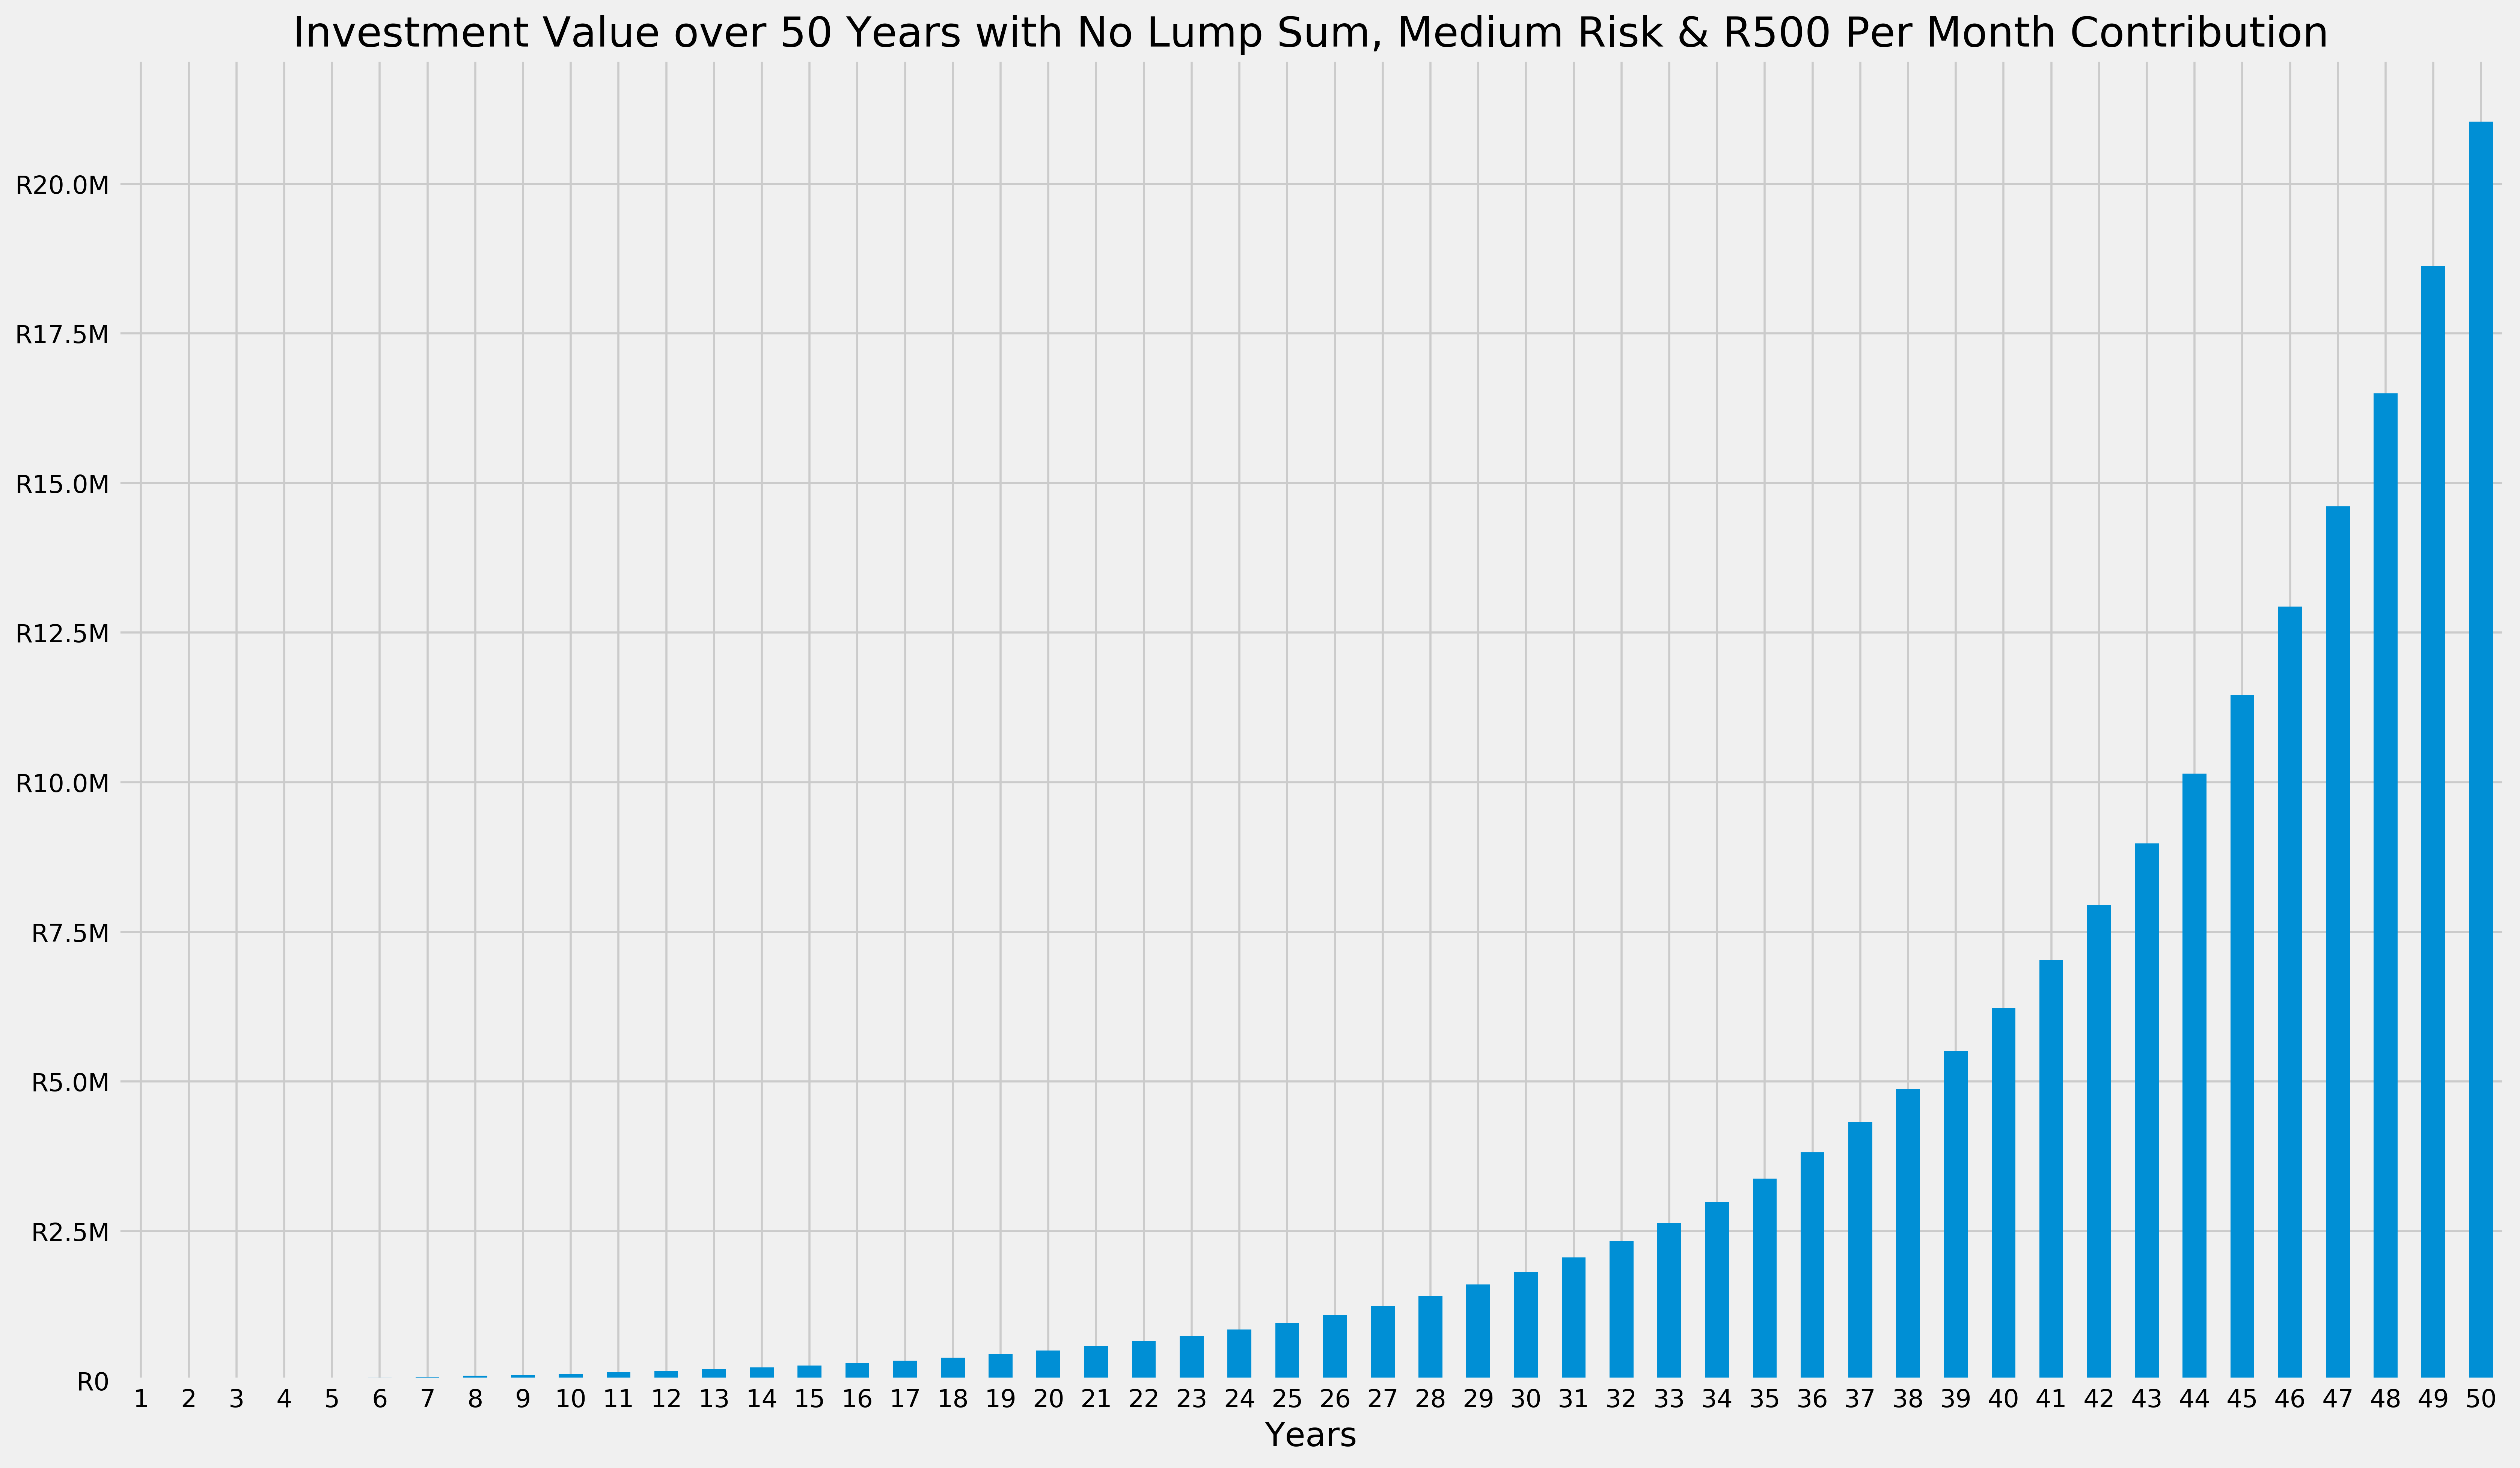

In [158]:
fig, ax = plt.subplots(1, 1, dpi=400)
data[(data.monthly==500) & (data.lump_sum==0) & (data.risk=="medium")].pivot_table(index="horizon", values="fv").plot.bar(figsize=(17, 10), legend=False, ax=ax)
ax.set_xlabel("Years")
ax.set_title("Investment Value over 50 Years with No Lump Sum, Medium Risk & R500 Per Month Contribution")
ax.yaxis.set_major_formatter(axes_formatter)
plt.xticks(rotation=0)
save_fig('investment-50-years-no-lump-sum-500-monthly-medium-risk')

> This graph clearly shows us the value of compound interest, specifically, the value of compound interest over time. 

Even with no lump sum, if we are patient and keep all our money in the fund, over the course of a lifetime, we can make a substantial amount of money. As we mentioned up front, the big caveat here is these values are idealised and in real-life, they would be subject to market fluctuations. This means we wouldn't get a perfect 12.18% return each year and due to inflation the value of the money in 50 years time is not the same as it is today, however, it still paints a very clear picture that starting to invest as early as possible **_really_** does matter.

When I look at this graph, it makes me sad that I didn't start saving much earlier in life. We're going to unpack this in much more detail as we move through the analysis.

# How Time and Risk Affects Our Investment

Let's build on this by comparing how risk category affects the outcome. We'll stick with the same example of zero lump sum and R500 per month contributions. We'll also zoom in on the 0 - 30 year period.

Saving figure investment-30-years-no-lump-sum-500-monthly-all-risks


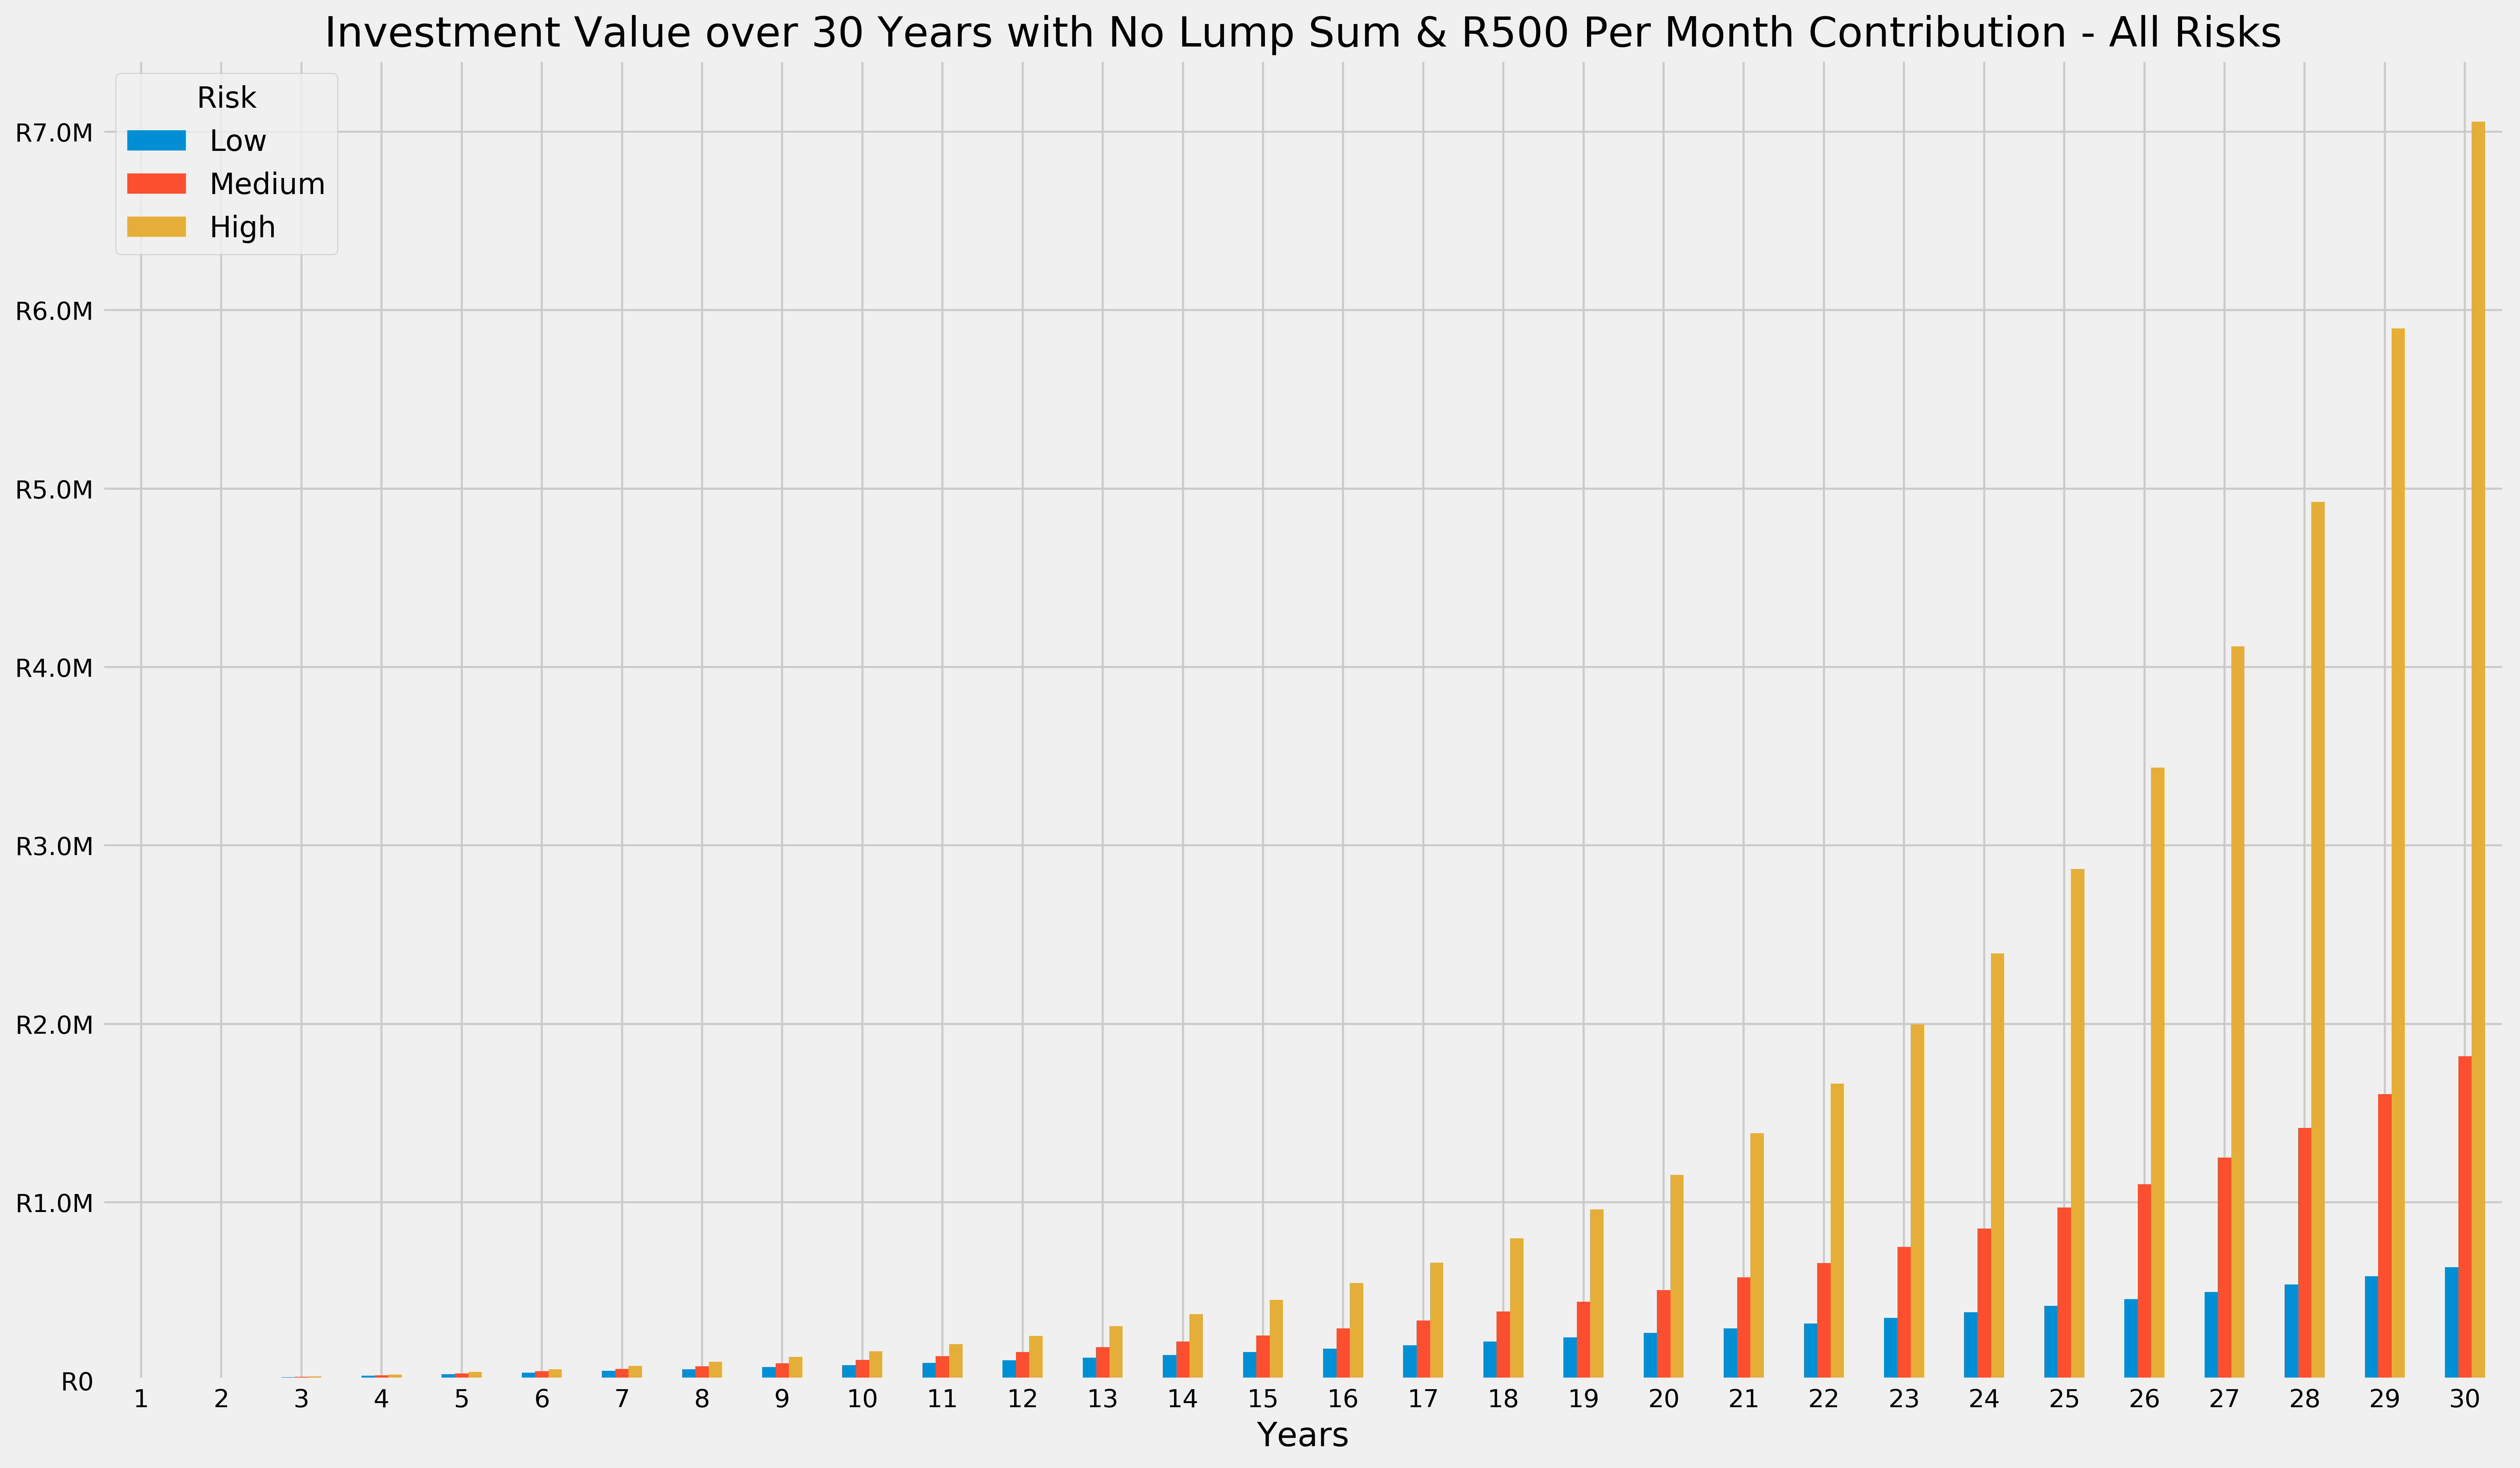

In [159]:
risk_labels = ["Low", "Medium", "High"]
fig, ax = plt.subplots(1, 1, dpi=400)
df = data[(data.monthly==500) & (data.lump_sum==0) & (data.horizon <= 30) & ((data.risk == "low") | (data.risk == "medium") | (data.risk == "high"))].pivot_table(index="horizon", values="fv", columns="risk")
df = df.reindex(["low", "medium", "high"], axis=1)
df.plot.bar(figsize=(17, 10), ax=ax)
ax.set_xlabel("Years")
ax.set_title("Investment Value over 30 Years with No Lump Sum & R500 Per Month Contribution - All Risks")
ax.yaxis.set_major_formatter(axes_formatter)
ax.legend(title="Risk", labels=risk_labels)
plt.xticks(rotation=0)
save_fig('investment-30-years-no-lump-sum-500-monthly-all-risks')

> Clearly, the rate of return given by the risk of the investment matters. 

Does this mean you should just go straight for a high risk investment? **Of course not**. By it's very nature, it is **_high_** risk and however inviting these numbers might look, you probably won't get them. In fact, one must remember that even a low-risk option still carries risk. Another global recession can wipe out a hefty chunk of your investment so as the saying goes, don't put all your eggs in one basket. Of course, this is the idea with the lower risk investments;    they aim to be more balanced, less speculative, more diversified and hence more immune to large scale financial crises that can affect whole segements of the market.

# How Monthly Contribution and Lump Sum Affects Our Investment

This time we're going to assume a few different combinations, specifically time horizon's of 2, 5, 10 and 20 years; monthly contributions of R250, R500, and R1000 per month and lump sums of R0, R1,000, R5,000, R10,000 and R20,000. Initially let's stick with the medium risk category.

In [181]:
horizons = [2, 5, 10, 20, 30, 40]

fig, ax = plt.subplots(3, 2, sharey='row', dpi=400)
fig.subplots_adjust(hspace=0.4)

for ax, horizon in zip(ax.ravel(), horizons):
    ax.yaxis.set_major_formatter(axes_formatter)
    df = data[((data.monthly == 250) | (data.monthly == 500) | (data.monthly == 1000)) & ((data.lump_sum==0) | (data.lump_sum==1000) | (data.lump_sum==5000) | (data.lump_sum==10000) | (data.lump_sum==20000)) & (data.risk == "medium") & (data.horizon == horizon)]
    df.pivot_table(index="monthly", columns="lump_sum", values="fv").plot.bar(figsize=(20, 20), ax=ax)
    ax.set_title("Investment after " + str(horizon) + " years - Medium Risk")
    ax.set_xlabel("Monthly Contribution")
    ax.legend(title="Lump Sum", labels=('None', 'R1,000', 'R5,000', 'R10,000', 'R20,000'))
    ax.tick_params(axis="x", labelrotation=0)
    ax.set_xticklabels(labels=["R250", "R500", "R1,000"])
save_fig('investment-multiple-years-risks-lump-sum-monthly-contrib')

Saving figure investment-multiple-years-risks-lump-sum-monthly-contrib


While it's clear that monthly contribution and time horizon matter, whether or not someone should wait till they have a sizeable lump sum is less clear. On the one hand, starting the fund off with something rather than nothing does increase the investment value, but if it takes you 1-2 years to save the lump sum in the first place, **wouldn't it be better to be earn compound interest sooner rather than later?** Then a follow up question: If your funds are limited, should you start with no lump sum and a bigger monthly contribution or would a large lump sum and smaller monthly contributions suffice?

Let's study this by comparing an investment of R250 per month and lump sum in the region of R25K - R30K with an investment of R500 per month and a lump sum in the region of R0 - R5K. We'll use a medium risk and time horizon of 30 years.

In [185]:
mean_250pm_big_lump = round(data[(data.monthly==250) & (data.risk=="medium") & (data.horizon==30) & (data.lump_sum_cat=="R25K-R30K")]["fv"].mean())
contrib_250pm_big_lump = 250*30*12
mean_big_lump = round(data[(data.monthly==250) & (data.risk=="medium") & (data.horizon==30) & (data.lump_sum_cat=="R25K-R30K")]["lump_sum"].mean())

In [186]:
mean_500pm_small_lump = round(data[(data.monthly==500) & (data.risk=="medium") & (data.horizon==30) & (data.lump_sum_cat=="0-R5K")]["fv"].mean())
contrib_500pm_small_lump = 500*30*12
mean_small_lump = round(data[(data.monthly==500) & (data.risk=="medium") & (data.horizon==30) & (data.lump_sum_cat=="0-R5K")]["lump_sum"].mean())

In [187]:
df = pd.DataFrame({'Investment Value': [mean_250pm_big_lump, mean_500pm_small_lump], 'Monthly Contrib': [250, 500], 'Total Monthly Contrib. Over 30 Years': [contrib_250pm_big_lump, contrib_500pm_small_lump], 'Lump Sum': [mean_big_lump, mean_small_lump]})
df

Investment Value  Monthly Contrib  Total Monthly Contrib. Over 30 Years  \
0           1957101              250                                 90000   
1           1913719              500                                180000   

   Lump Sum  
0     27625  
1      2500

In [188]:
df["Total Invested (Total Monthly + Lump Sum)"] = df["Total Monthly Contrib. Over 30 Years"] + df["Lump Sum"]
df

Investment Value  Monthly Contrib  Total Monthly Contrib. Over 30 Years  \
0           1957101              250                                 90000   
1           1913719              500                                180000   

   Lump Sum  Total Invested (Total Monthly + Lump Sum)  
0     27625                                     117625  
1      2500                                     182500

In [189]:
df["Extra Cash on Hand Over 30 Years"] = [500*30*12 - 250*30*12, 0] - df["Lump Sum"]
df.loc[1]["Extra Cash on Hand Over 30 Years"] = 0
df

Investment Value  Monthly Contrib  Total Monthly Contrib. Over 30 Years  \
0           1957101              250                                 90000   
1           1913719              500                                180000   

   Lump Sum  Total Invested (Total Monthly + Lump Sum)  \
0     27625                                     117625   
1      2500                                     182500   

   Extra Cash on Hand Over 30 Years  
0                             62375  
1                                 0

Saving figure comparing-large-lump-small-monthly-small-lump-large-monthly


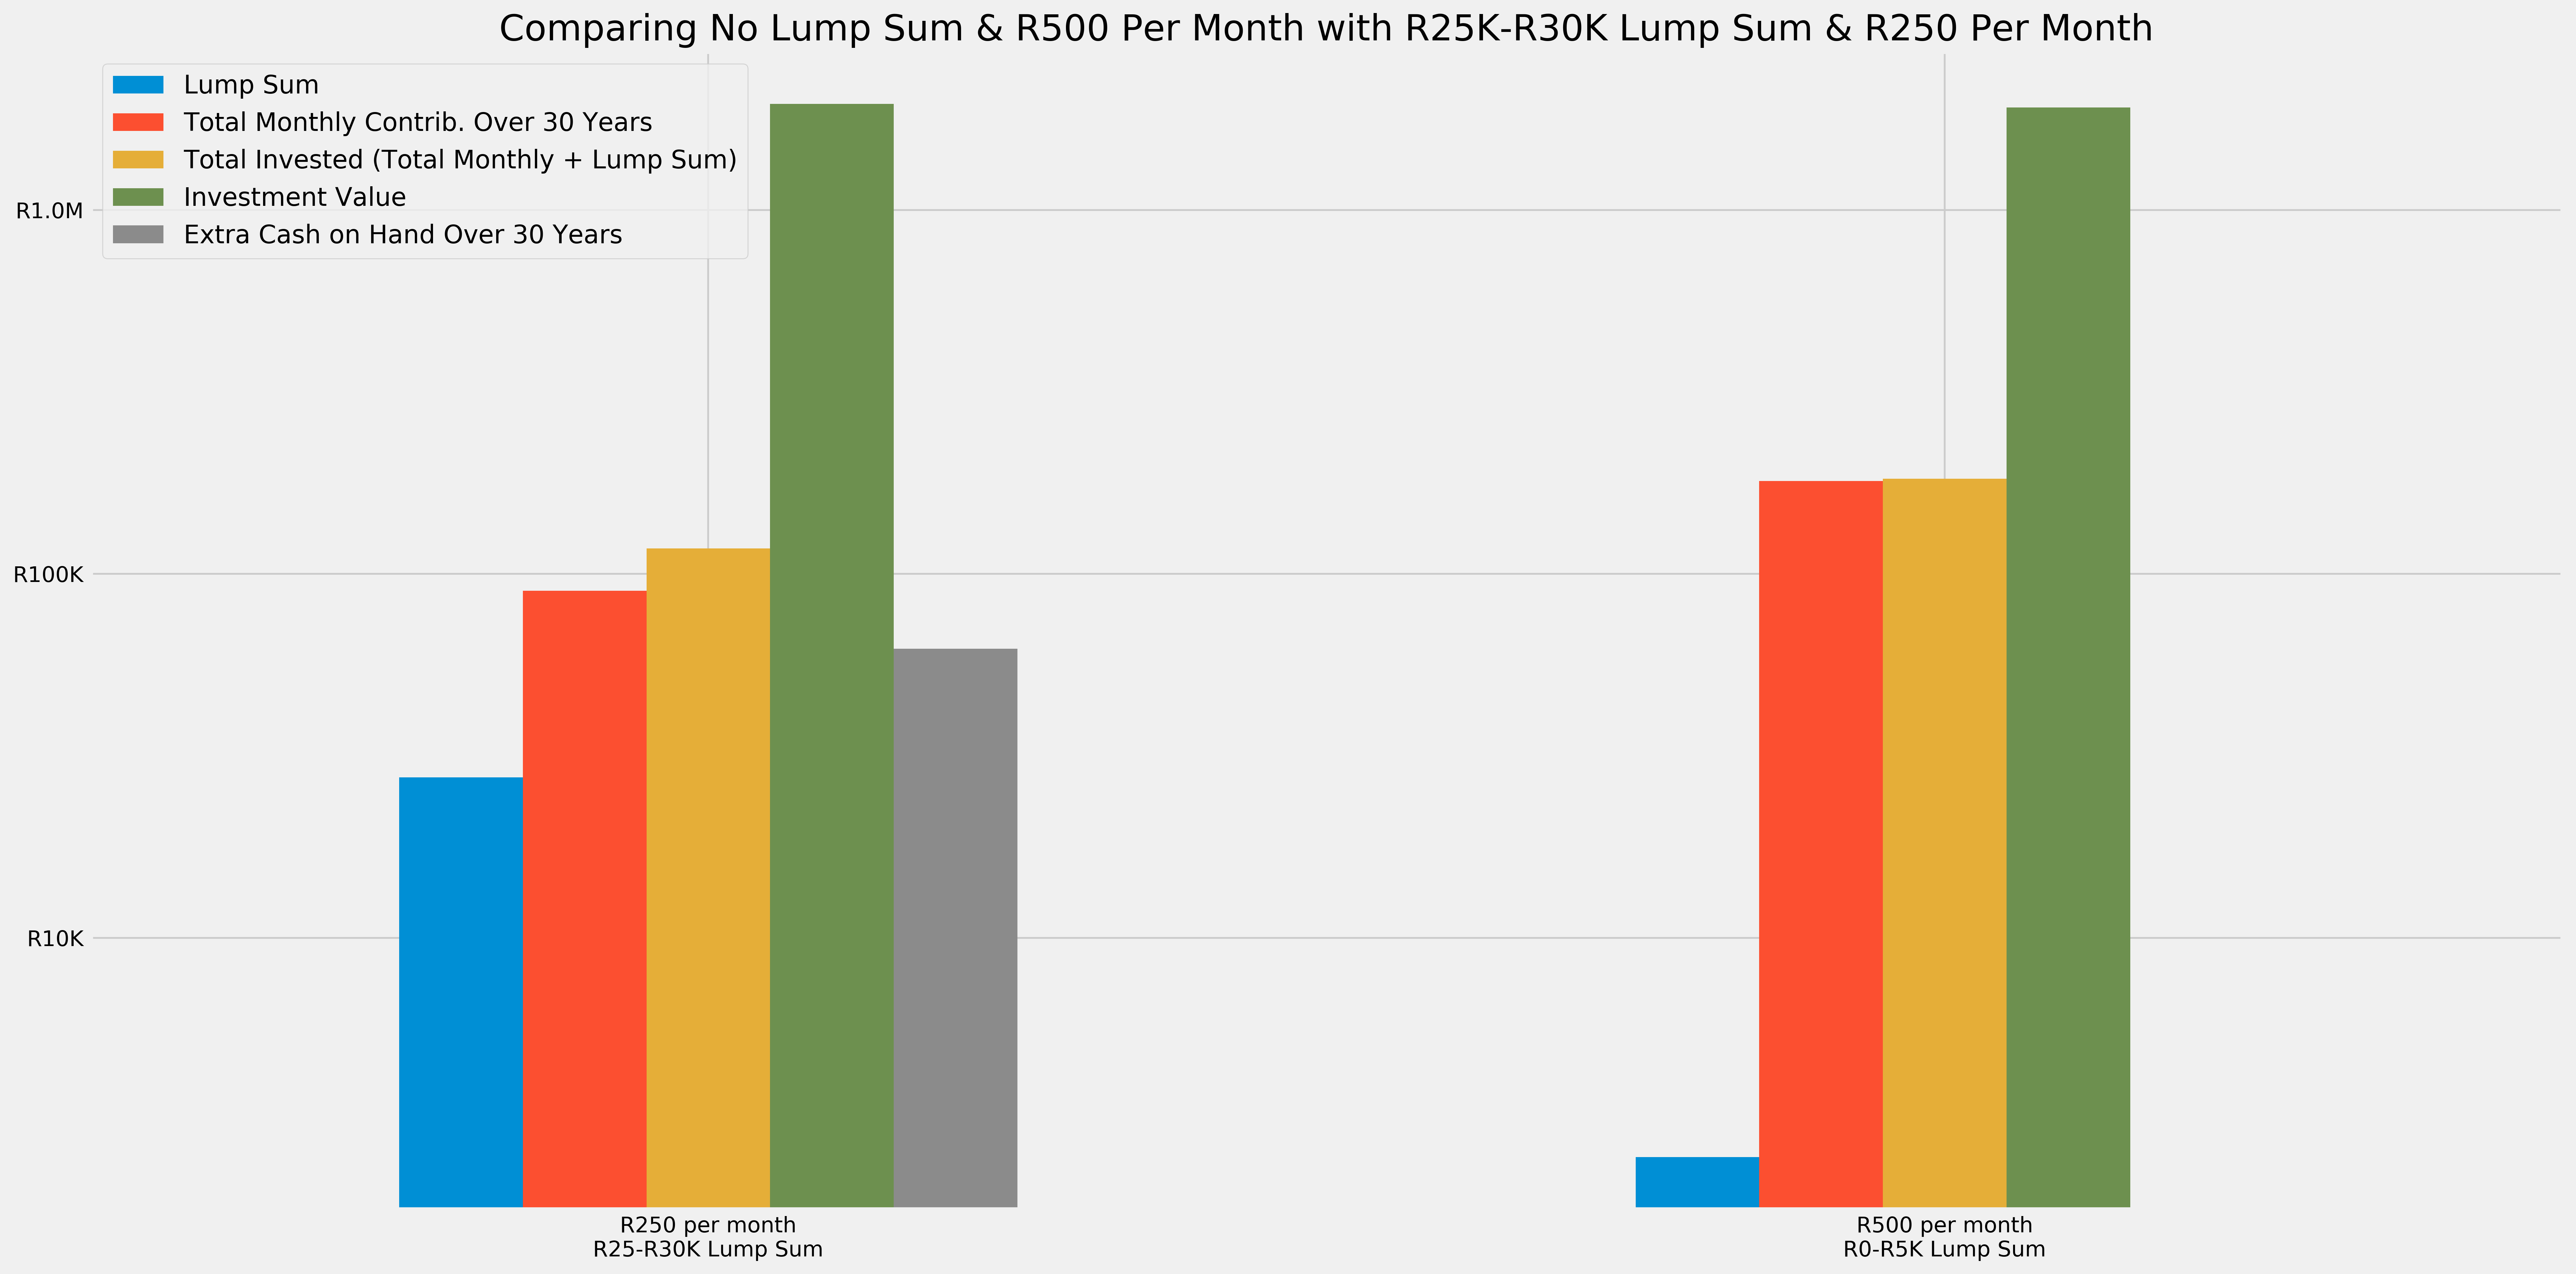

In [192]:
cols_index = ["Monthly Contrib", "Lump Sum", "Total Monthly Contrib. Over 30 Years", "Total Invested (Total Monthly + Lump Sum)", "Investment Value", "Extra Cash on Hand Over 30 Years"]
cols_to_show = ["Lump Sum", "Total Monthly Contrib. Over 30 Years", "Total Invested (Total Monthly + Lump Sum)", "Investment Value", "Extra Cash on Hand Over 30 Years"]
df = df.reindex(cols_index, axis=1)
fig, ax = plt.subplots(1, 1, dpi=400)
df[cols_to_show].plot.bar(logy=True, ax=ax, figsize=(20, 10))
ax.set_xticklabels(labels=["R250 per month\nR25-R30K Lump Sum", "R500 per month\nR0-R5K Lump Sum"])
ax.yaxis.set_major_formatter(axes_formatter)
ax.set_title("Comparing No Lump Sum & R500 Per Month with R25K-R30K Lump Sum & R250 Per Month")
plt.xticks(rotation=0)
save_fig('comparing-large-lump-small-monthly-small-lump-large-monthly')

Extra Cash on Hand is the difference between the R500 per month and R250 per month contributions summed over 30 years, less the lump sum paid. It represents the money we save by putting less into the fund each month, even though we've used a bigger lump sum upfront, in the case of the first option.

Looking at the R250 per month case, the graph shows that we invest less money into the fund overall, while earning a similar return when we start off with a bigger lump sum, even if we contribute less each month. Hence if you can afford to, it pays to have a sizeable lump sum.

But what if you don't have a lump sum available, should you save for it first before investing? No, rather start investing what you have right away. As we showed earlier:

> The power of compound interest over the long term is more profound than having an initial lump sum, so rather get your money making more money for you, as soon as possible.

# Combining Monthly Contribution, Lump Sum and Risk

In the previous example, we assumed a medium risk category, let's see what happens when we change the risk.

We'll do this two ways: first we'll assume a lump sum of R0, then one of R10,000.

Saving figure comparing-earnings-across-risks-no-lump-sum


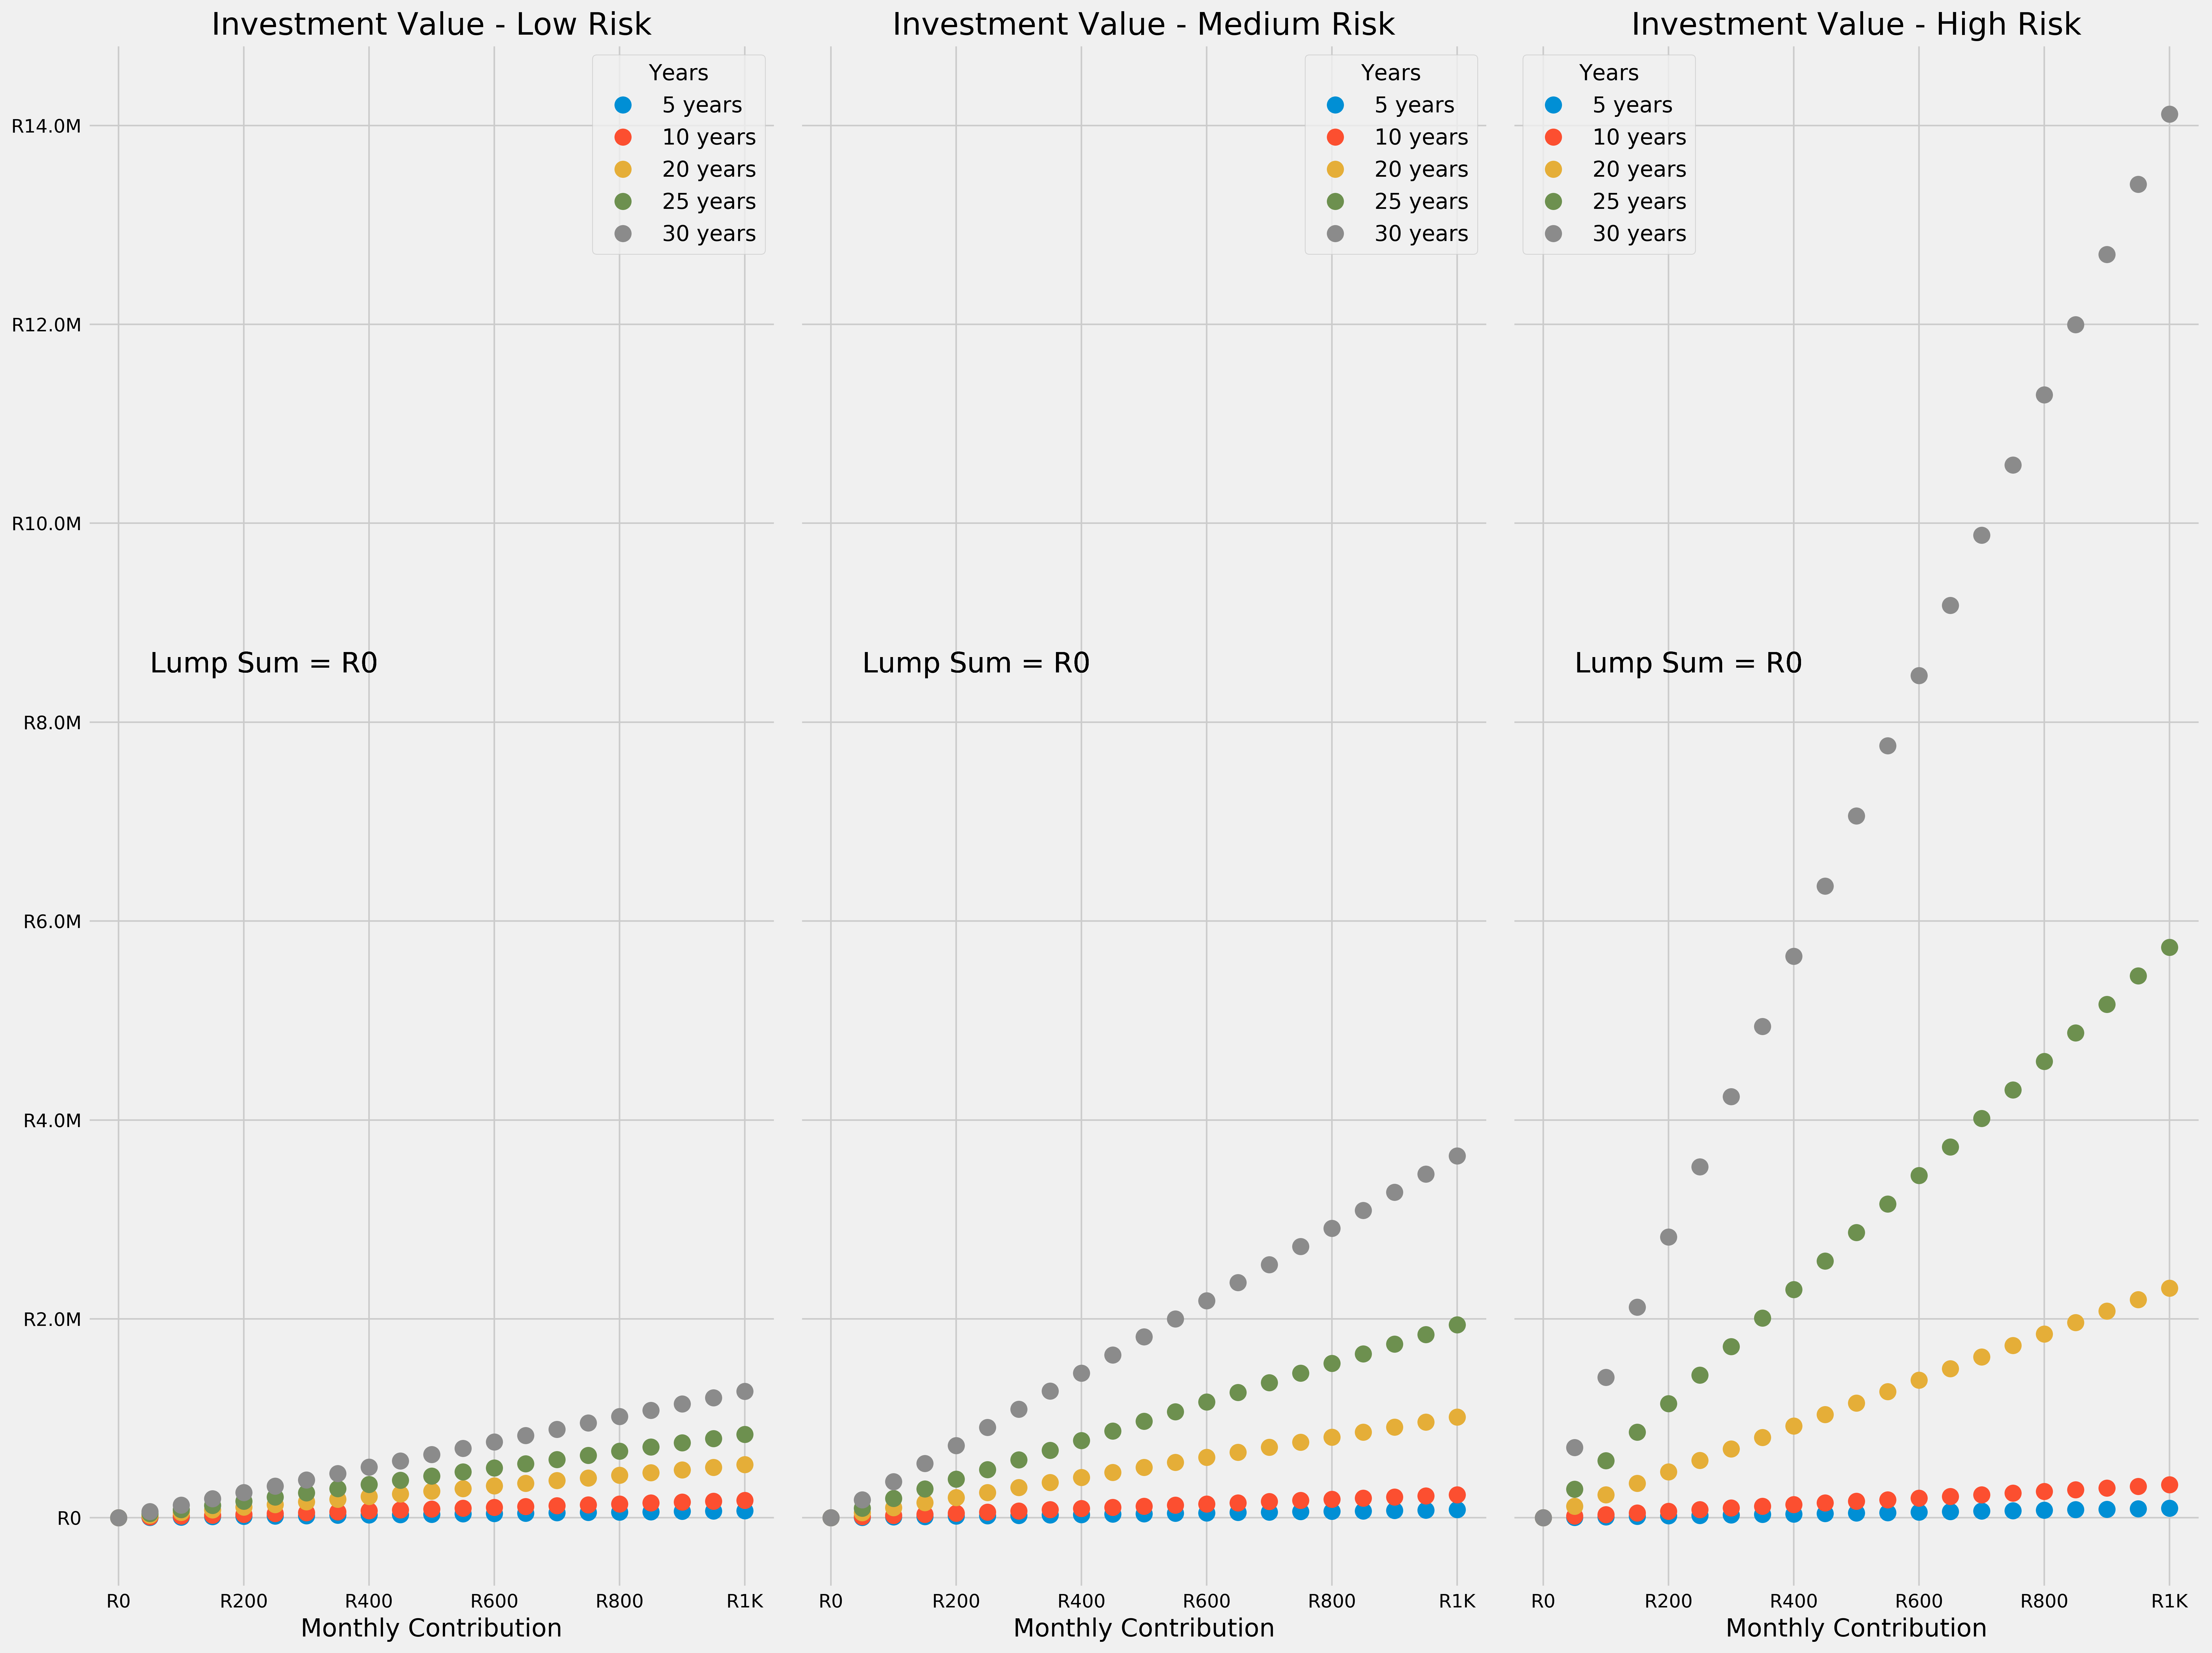

In [167]:
fig, ax = plt.subplots(1, 3, dpi=400, sharey='row', figsize=(20, 15))
fig.subplots_adjust(hspace=0.4)

horizons = (5, 10, 20, 25, 30)
risks = ["low", "medium", "high"]
risks_label = ["Low", "Medium", "High"]

for ax, risk, risk_label in zip(ax.ravel(), risks, risks_label):
    ax.yaxis.set_major_formatter(axes_formatter)
    ax.xaxis.set_major_formatter(axes_formatter)
    
    for horizon in horizons:
        df = data[(data.horizon==horizon) & (data.lump_sum==0) & (data.risk==risk) & (data.monthly <= 1000)]    
        ax.plot(df.monthly, df.fv, label=str(horizon) + " years", marker='o', linestyle='None', markersize=10)        
        ax.set_title("Investment Value - " + risk_label + " Risk")
        ax.set_xlabel("Monthly Contribution")
        ax.tick_params(axis="x", labelrotation=0)
        ax.legend(title="Years")
        ax.annotate('Lump Sum = R0',
                     xy=(50, 8500000),
                     xytext=(50, 8500000),
                     ha="left",            
                     fontsize=18)
save_fig('comparing-earnings-across-risks-no-lump-sum')

Ah that high risk curve is a thing of beauty! If only it was guaranteed.

It's clear that risk does matter, the greater the risk, the greater the reward. Perhaps, as it's often suggested, one can start with higher risk options in their younger years and move down the risk categories as you get older.

If we look at a few specific points, we can see that on a medium risk product, we'd need to contribute R1,000 per month over 30 years to obtain the same value as R600 per month over 25 years on a high risk product. However that difference between 25 and 30 years on the high-risk product, regardless of how much you contribute per month, is really striking due to the long term effect of compound interest.

Let's plot the same graph but using R10,000 as a lump sum value.

Saving figure comparing-earnings-across-risks-10k-lump-sum


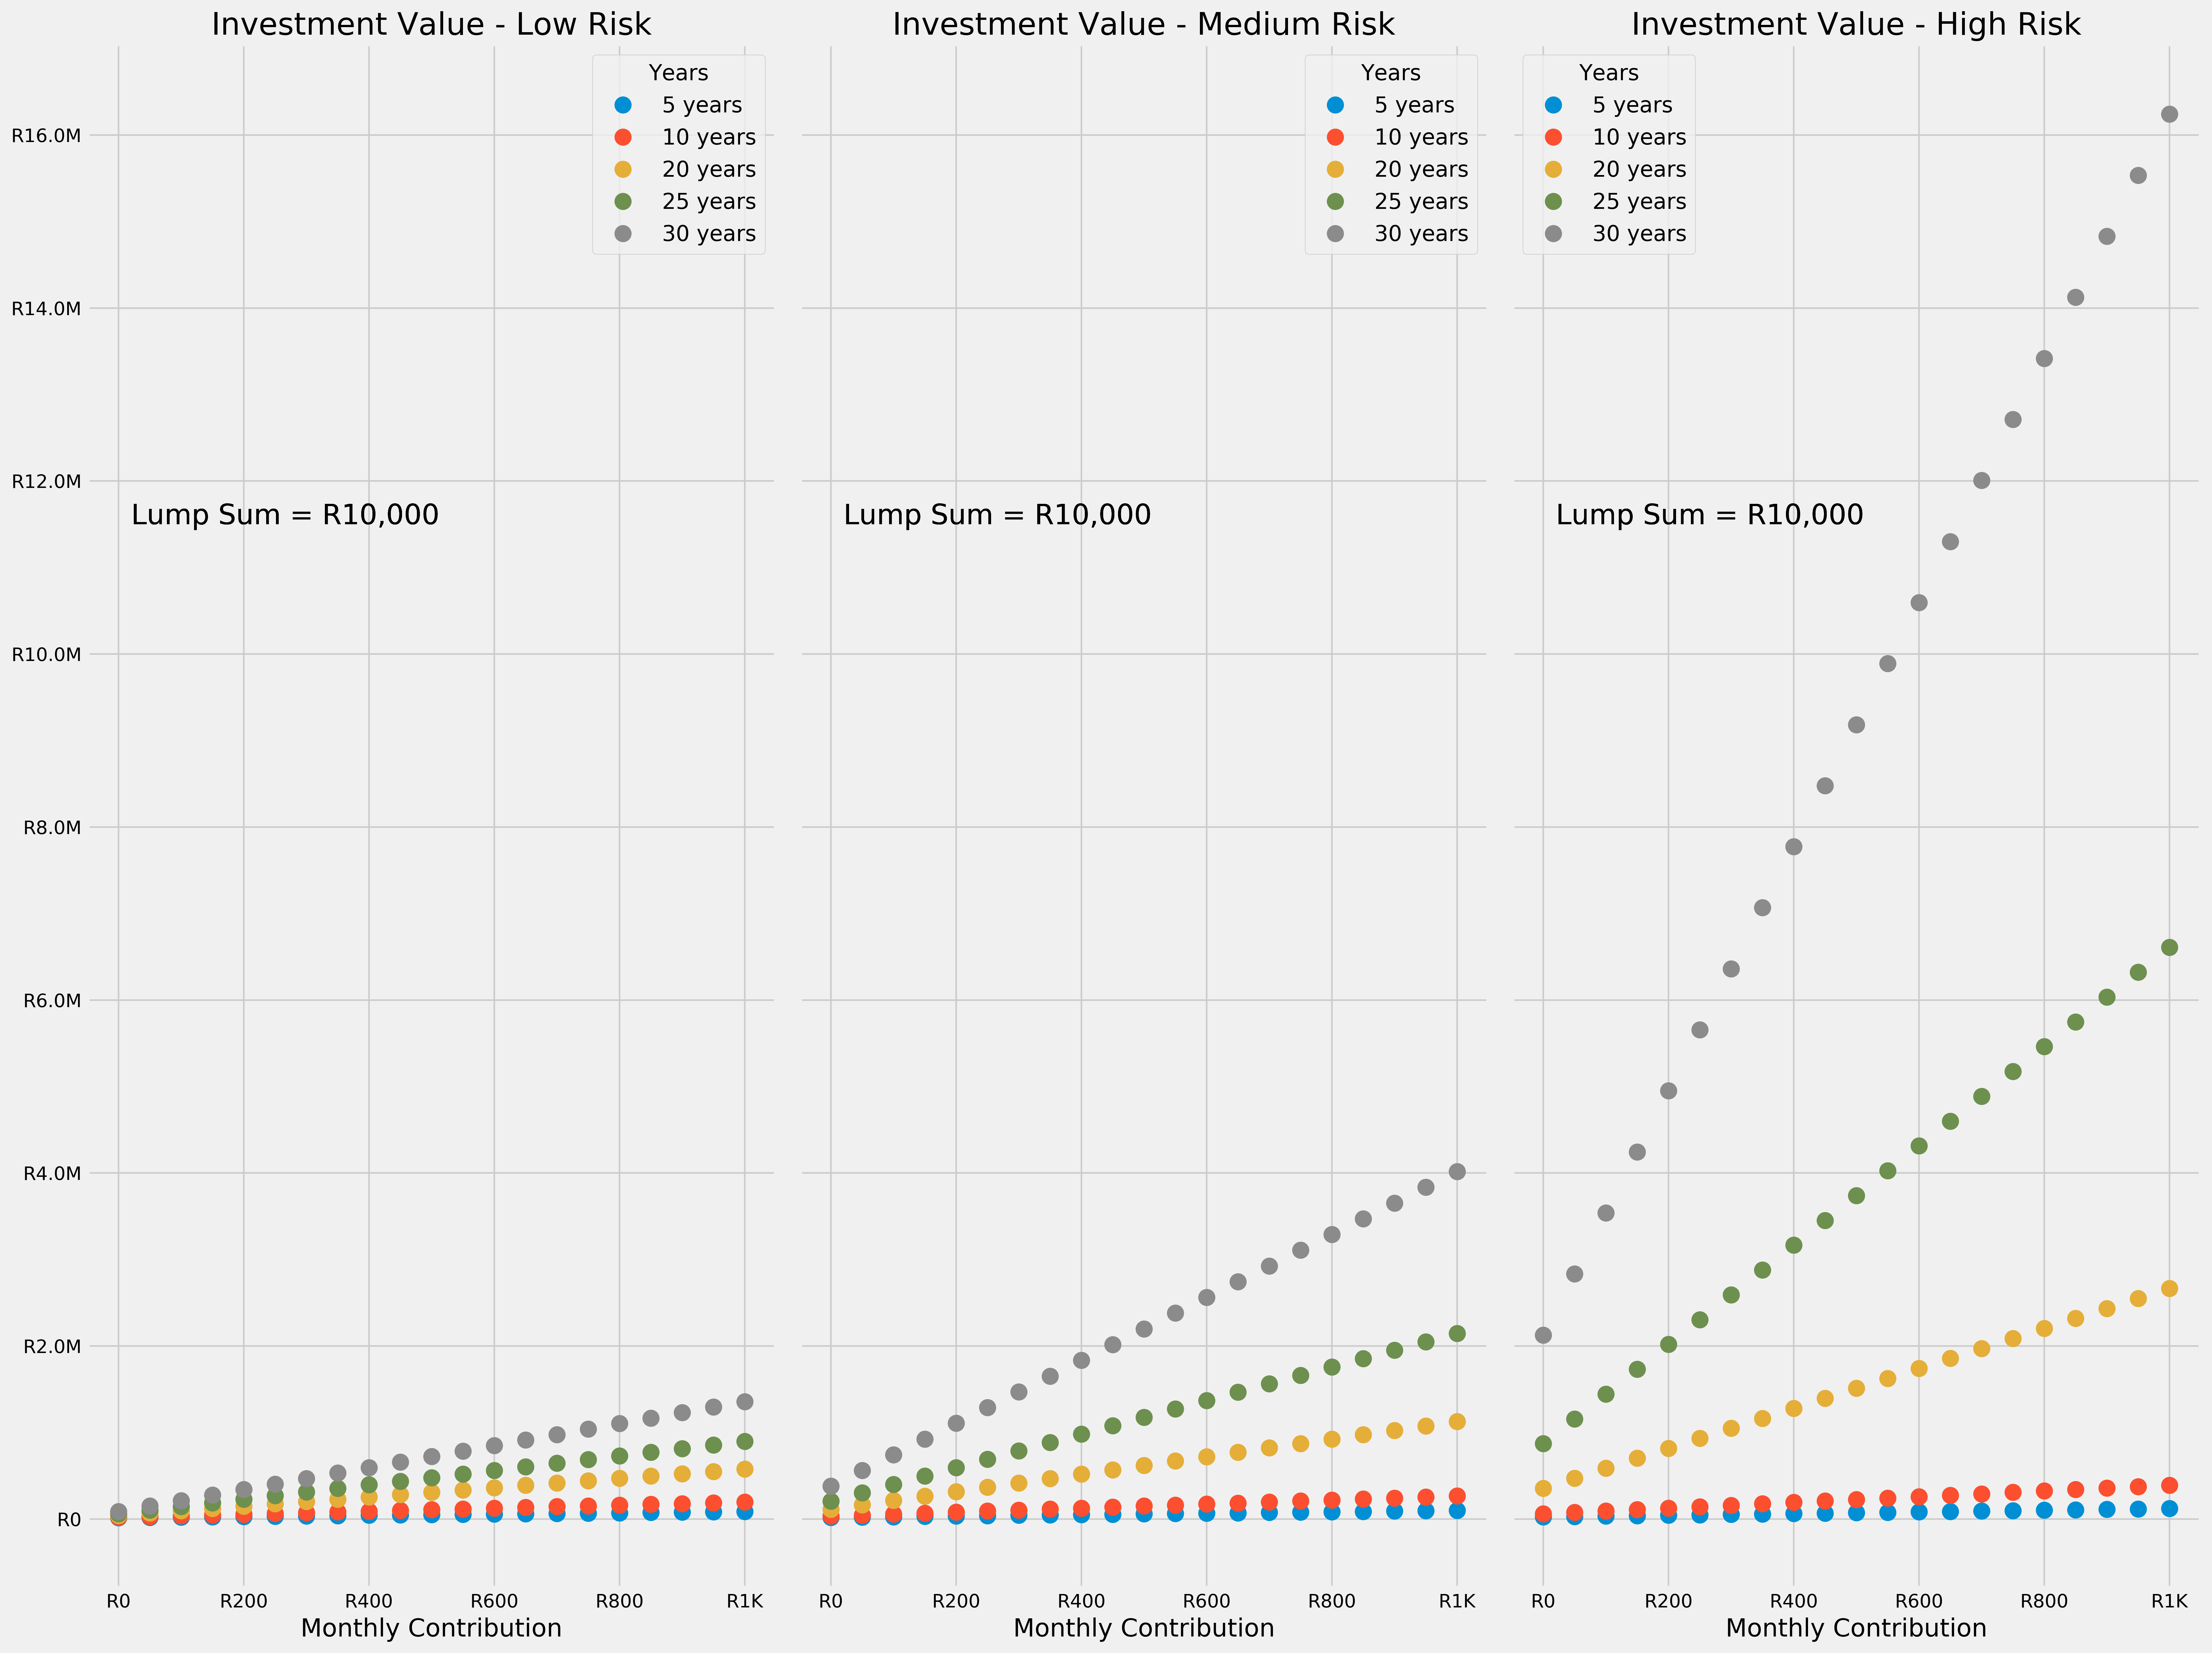

In [168]:
fig, ax = plt.subplots(1, 3, dpi=400, sharey='row', figsize=(20, 15))
fig.subplots_adjust(hspace=0.4)

horizons = (5, 10, 20, 25, 30)
risks = ["low", "medium", "high"]
risks_label = ["Low", "Medium", "High"]

for ax, risk, risk_label in zip(ax.ravel(), risks, risks_label):
    ax.yaxis.set_major_formatter(axes_formatter)
    ax.xaxis.set_major_formatter(axes_formatter)
    
    for horizon in horizons:
        df = data[(data.horizon==horizon) & (data.lump_sum==10000) & (data.risk==risk) & (data.monthly <= 1000)]    
        ax.plot(df.monthly, df.fv, label=str(horizon) + " years", marker='o', linestyle='None', markersize=10)        
        ax.set_title("Investment Value - " + risk_label + " Risk")
        ax.set_xlabel("Monthly Contribution")
        ax.tick_params(axis="x", labelrotation=0)
        ax.legend(title="Years")
        ax.annotate('Lump Sum = R10,000',
                     xy=(20, 11500000),
                     xytext=(20, 11500000),
                     ha="left",            
                     fontsize=18)
save_fig('comparing-earnings-across-risks-10k-lump-sum')

A difference, yes, but not a massive one. Again, we should rather start saving now than waiting to have a lump sum; it doesn't matter nearly as much as the years invested and how much you can contribute monthly. 

If, like me, you are about to have a baby and want to start putting money into a fund that in 18 years time could be used for your child's university education, what could you do? Let's compare different risks, monthly contributions and lump sum amounts over an 18 year window.

Saving figure investment-after-18-years-all-risks


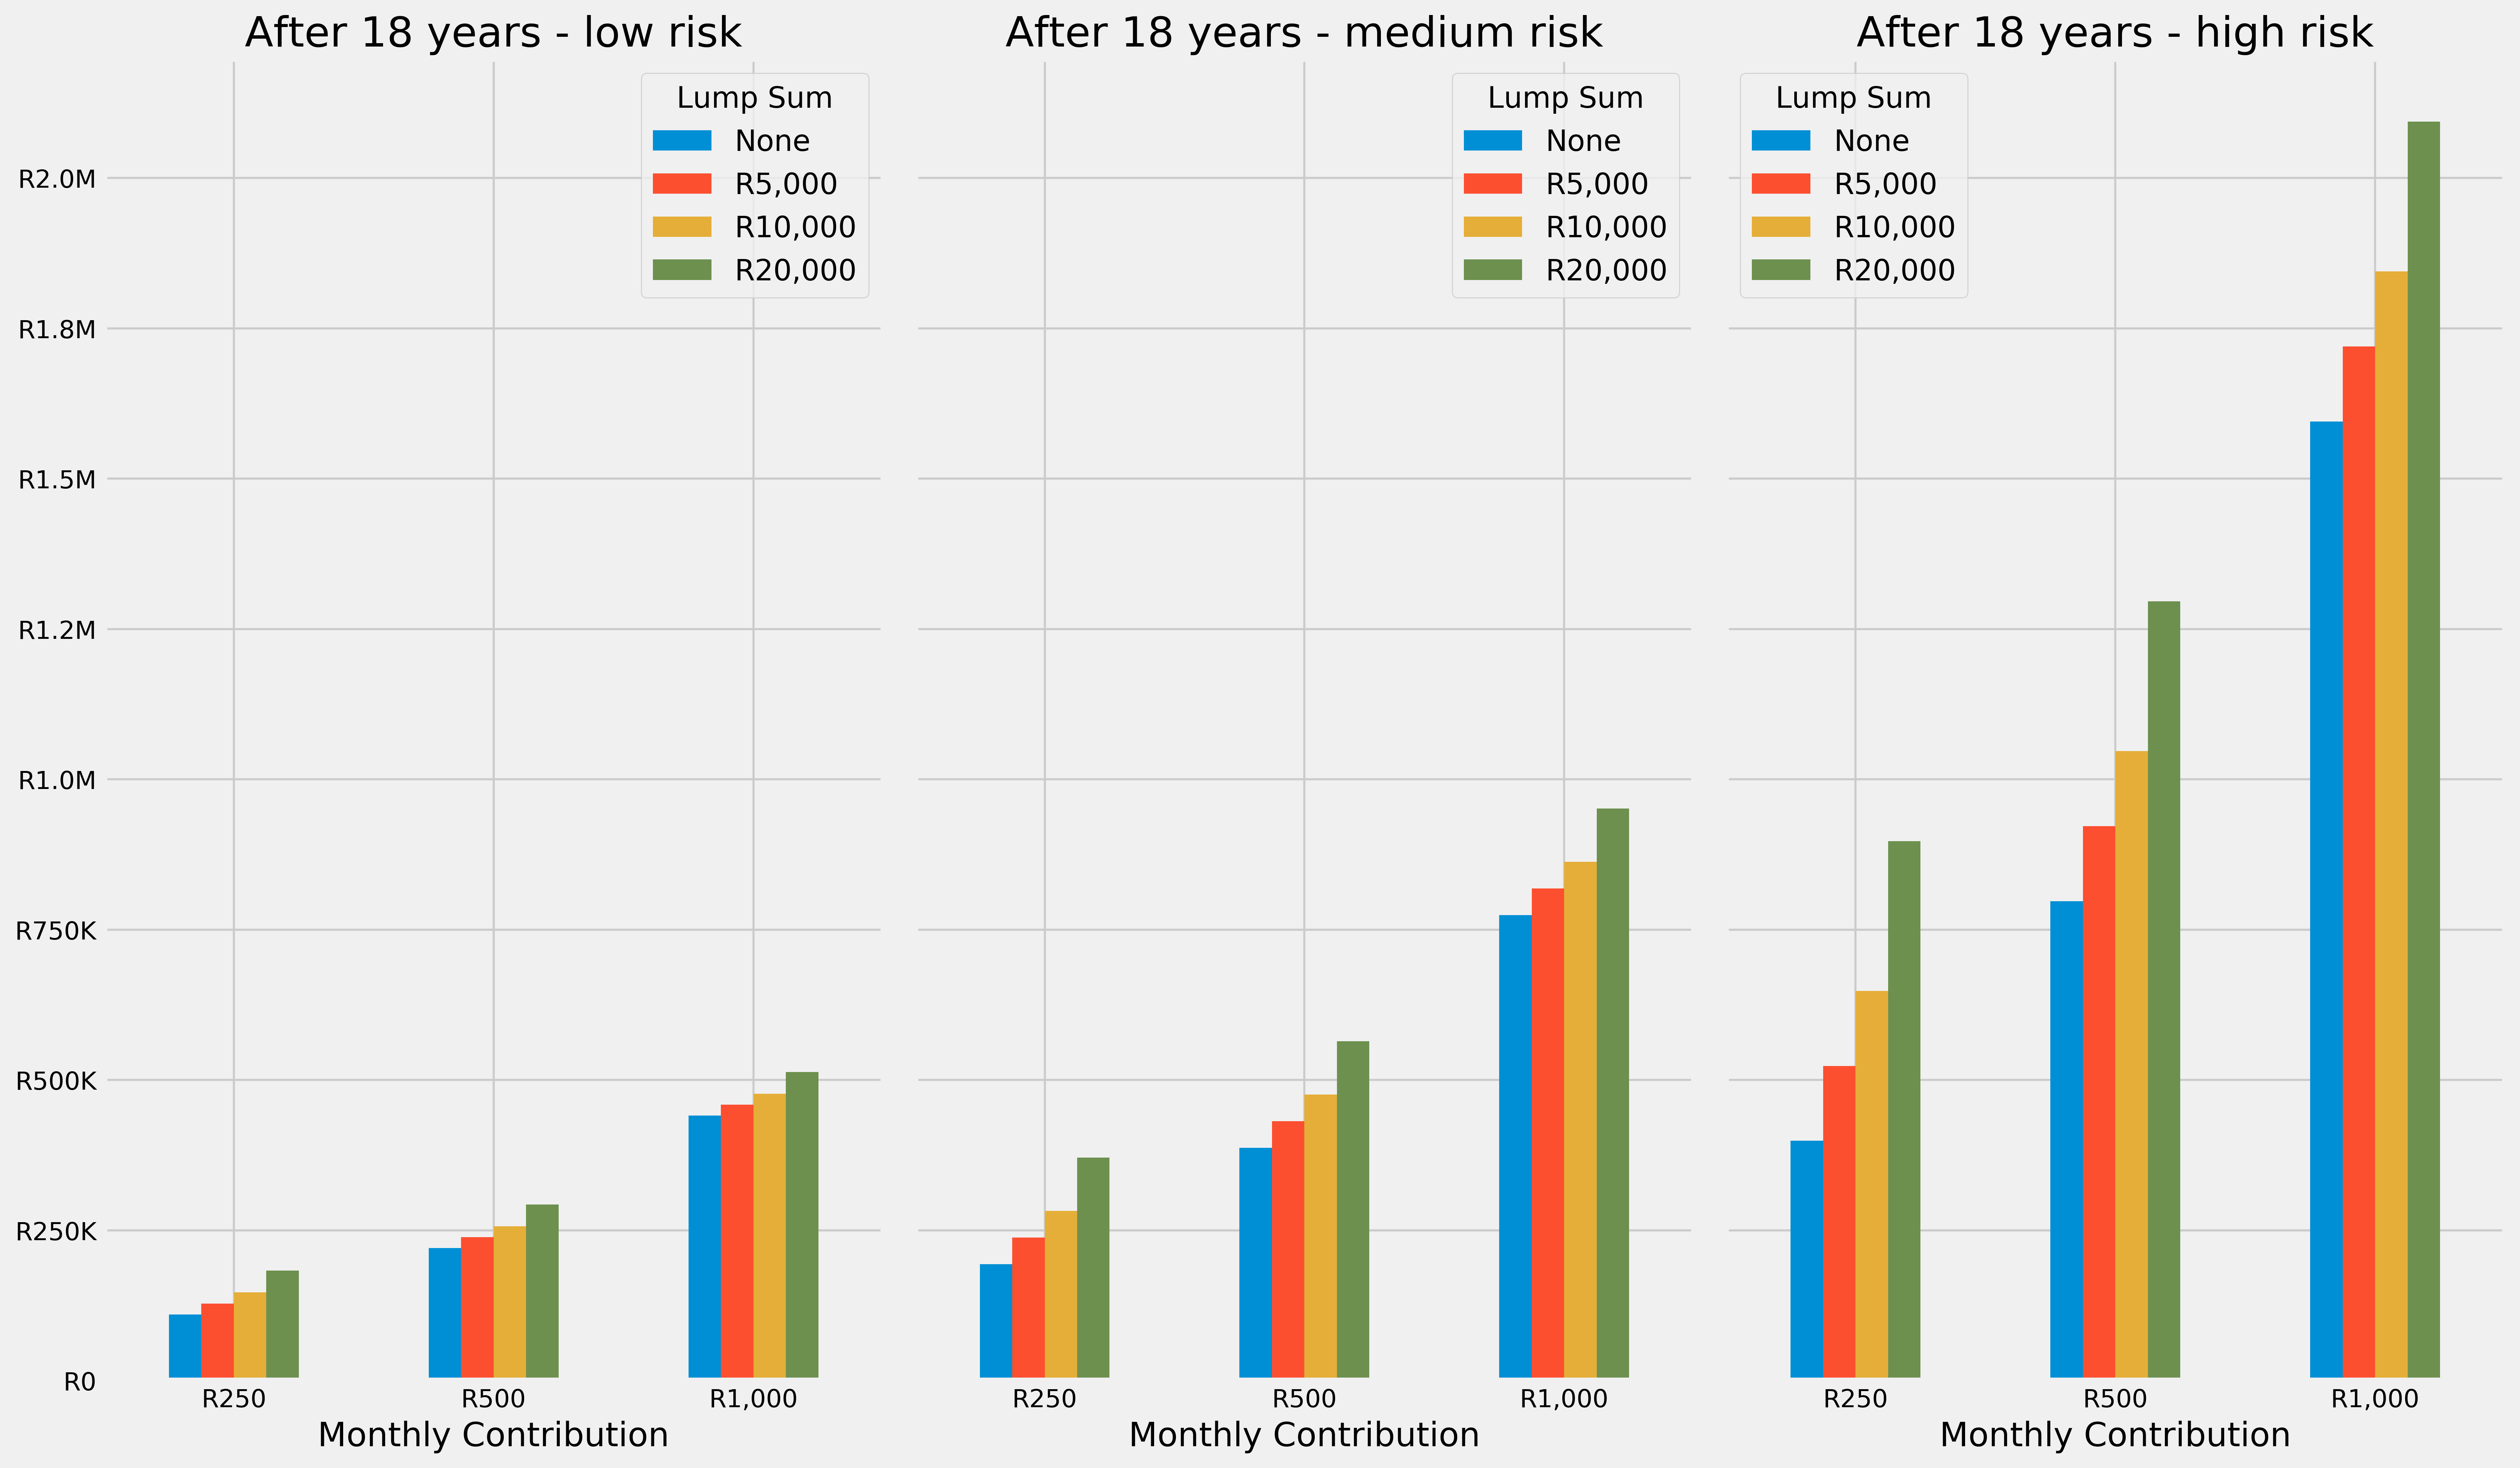

In [208]:
risks = ["low", "medium", "high"]

fig, ax = plt.subplots(1, 3, dpi=400, sharey=True)
width, height = plt.figaspect(1.68)
fig.figsize = (width, height)
fig.subplots_adjust(hspace=0.4)

for ax, risk in zip(ax.ravel(), risks):
    ax.yaxis.set_major_formatter(axes_formatter)
    df = data[((data.monthly == 250) | (data.monthly == 500) | (data.monthly == 1000)) & ((data.lump_sum==0) | (data.lump_sum==5000) | (data.lump_sum==10000) | (data.lump_sum==20000)) & (data.risk == risk) & (data.horizon == 18)]
    df.pivot_table(index="monthly", columns="lump_sum", values="fv").plot.bar(figsize=(17, 10), ax=ax)
    ax.set_title("After 18 years - " + risk + " risk")
    ax.set_xlabel("Monthly Contribution")
    ax.legend(title="Lump Sum", labels=('None', 'R5,000', 'R10,000', 'R20,000'))
    ax.tick_params(axis="x", labelrotation=0)
    ax.set_xticklabels(labels=["R250", "R500", "R1,000"])
save_fig('investment-after-18-years-all-risks')

Of course, the option you choose depends entirely on your personal situation, so there is no real advice that can be given here. It's simply useful to have a visual reminder about how the numbers play out.

Before we put this all together, I'd like to visualise these parameters in one more way.

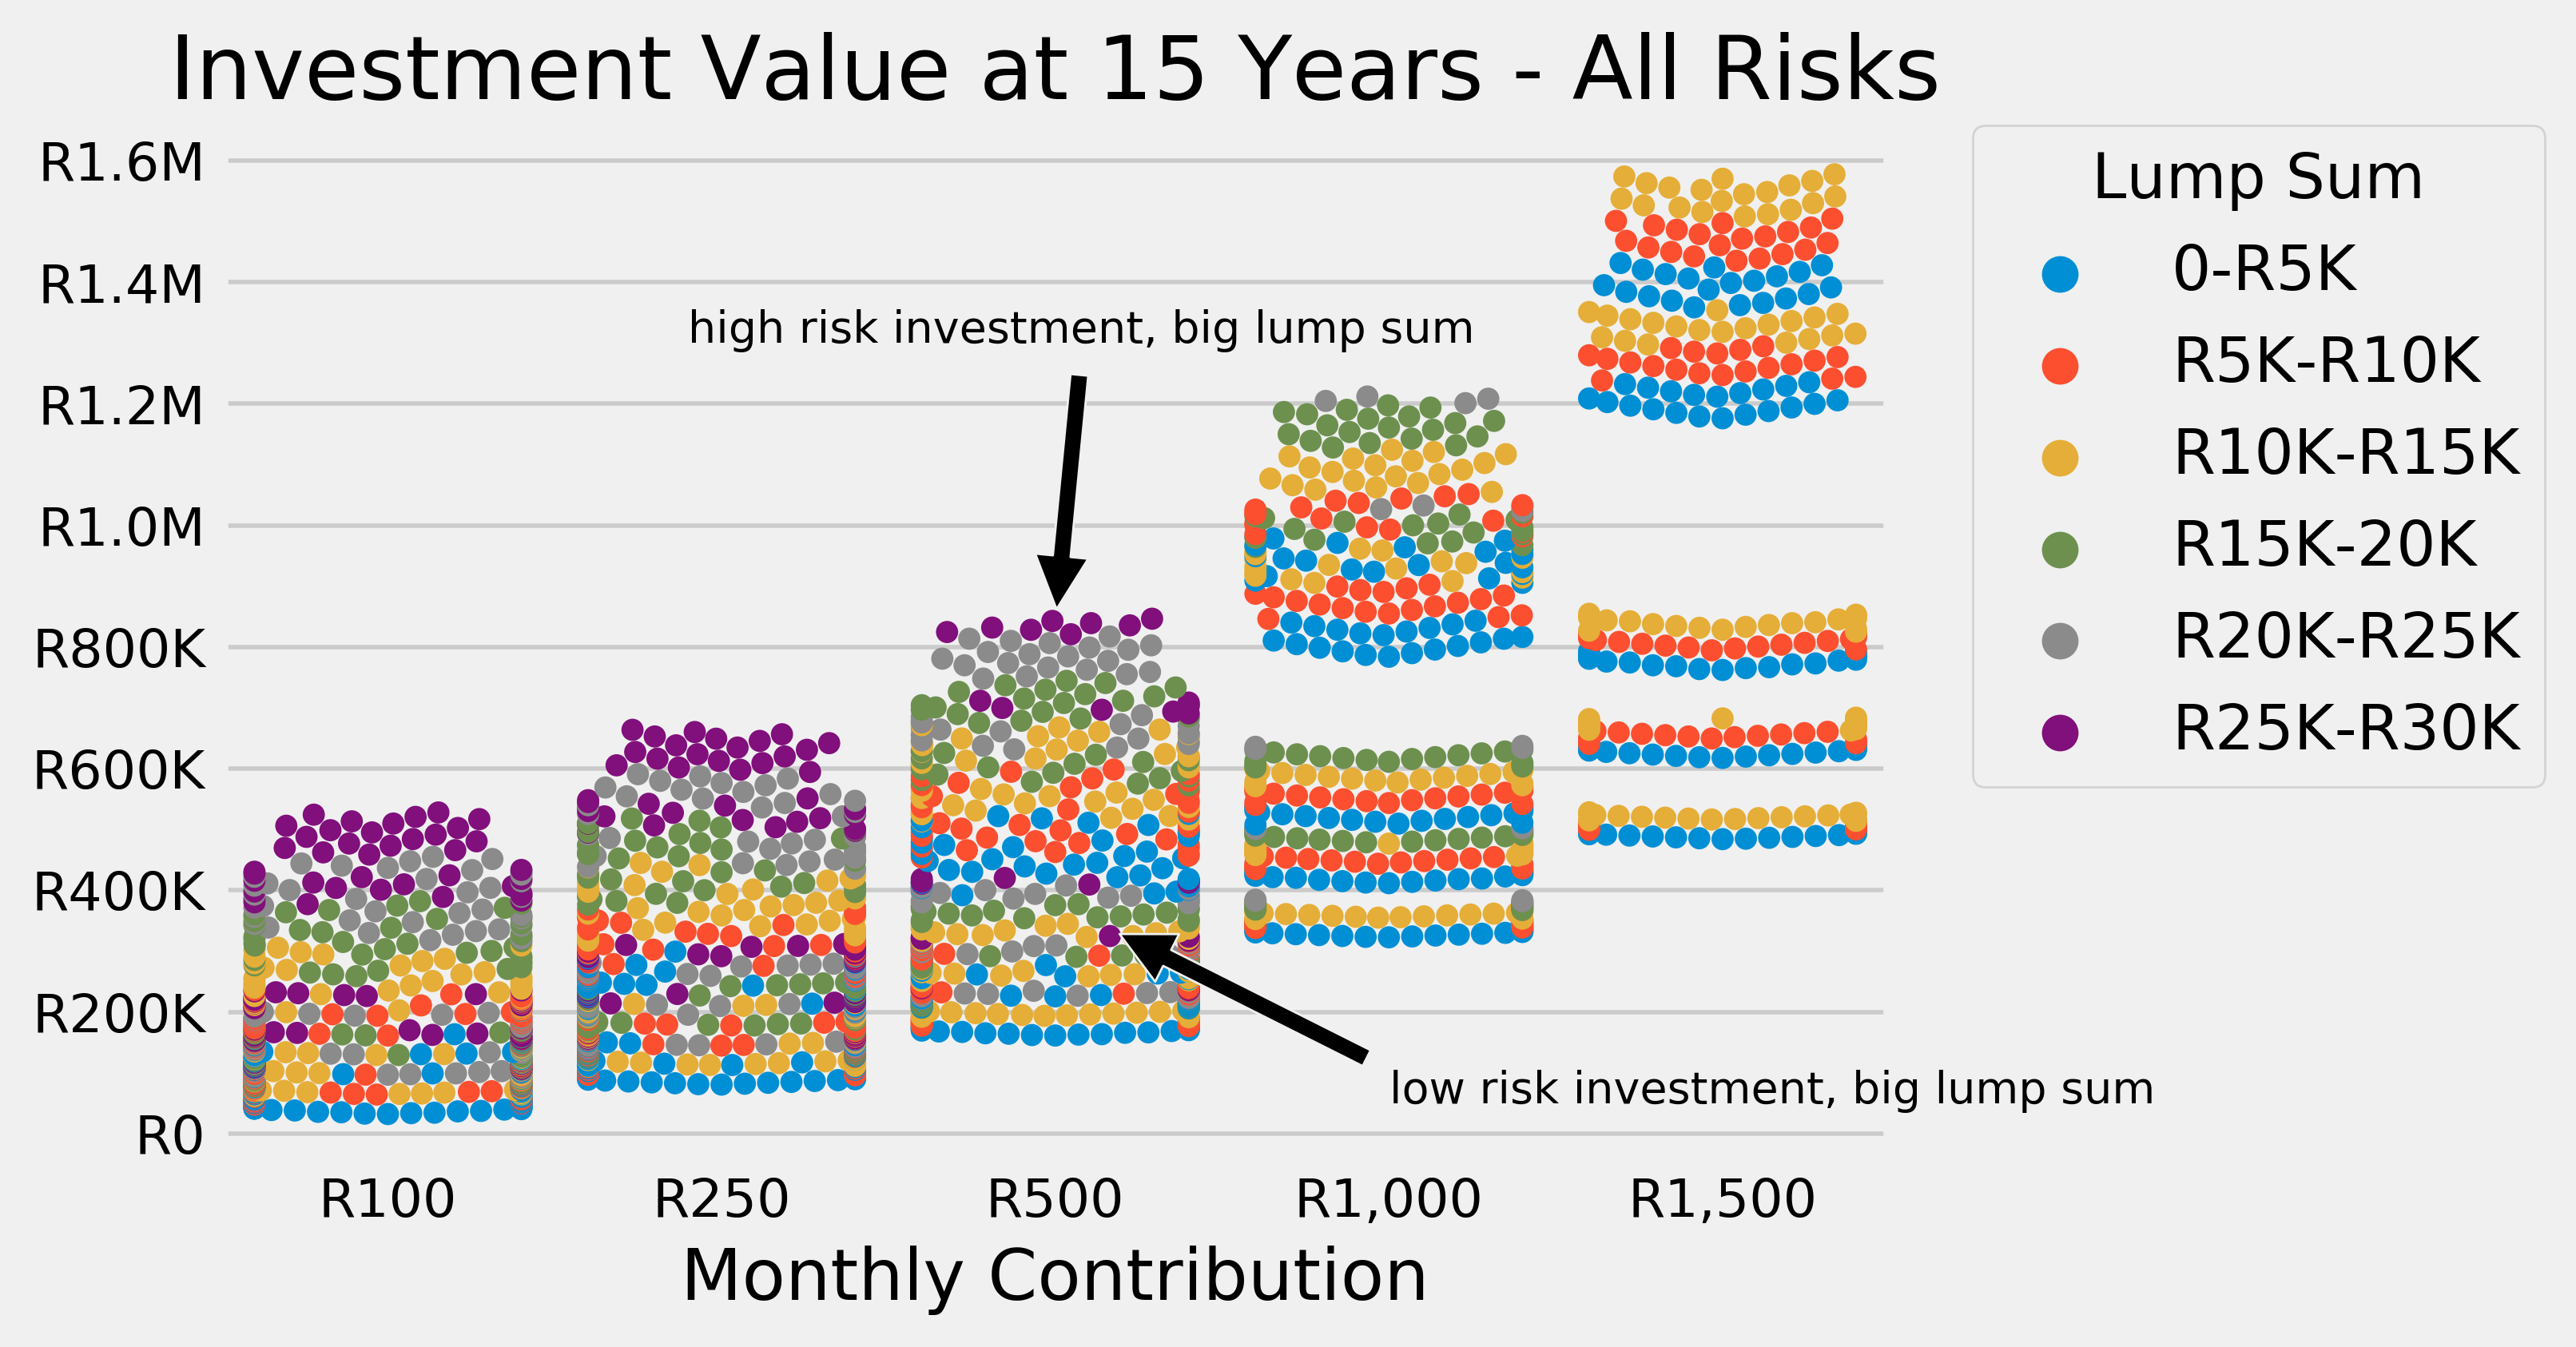

In [177]:
fig, ax = plt.subplots(1, 1, dpi=400)
width, height = plt.figaspect(1.68)
fig.figsize = (width, height)
fig.subplots_adjust(hspace=0.4)

df = data[(data.horizon==15) & ((data.monthly==100) | (data.monthly==250) | (data.monthly==500) | (data.monthly==1000) | (data.monthly==1500))]
ax = sns.swarmplot(x="monthly", y="fv", hue="lump_sum_cat", data=df, ax=ax)
ax.yaxis.set_major_formatter(axes_formatter)
ax.set_ylabel("")
ax.set_xlabel("Monthly Contribution")
ax.set_xticklabels(labels=["R100", "R250", "R500", "R1,000", "R1,500"])
ax.set_title("Investment Value at 15 Years - All Risks")

ax.annotate('low risk investment, big lump sum',             
             xy=(2.15, 340000),
             xytext=(4.15, 50000),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
            )

ax.annotate('high risk investment, big lump sum',            
             xy=(2, 840000),
             xytext=(0.9, 1300000),
             ha="left",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
            )


plt.legend(title="Lump Sum", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We're looking at all the possible investment combinations for different risks, bracketed by lump sum ranges and monthly contributions. The reason there are, for example, purple dots spread across the R500 section is because the ones nearer to the bottom are lower risk investments while the ones nearer to the top are higher risk investments. We know this because theoretically, high risk investment give us greater return than lower risk investments.

This graph is just a reminder that when choosing an investment product, one should get a clear understanding of the risk involved as this will make a big difference to your returns even for the same monthly contribution and same lump sum.

# Putting It All Together

You've probably been waiting for something that pulls all this together and show's you much time it will take to save different amounts given all risk, lump sum and monthly contribution options.

We're going to target a specific amount of savings (within R10K - R20K) and then plot all the combinations that lead to that value. These are probably the most useful graphs of the analysis and the ones you'll really want to hold onto, as they make it clear what is and isn't possible to achieve in a given timeframe.

In all of the cases below, it's useful to look across the risks to compare what time horizon, lump sum and monthly contribution is required to obtain the investment outcome of interest.

The pdf report at the end contains these and all the other graphs we've shown.

## Options for Saving R250K

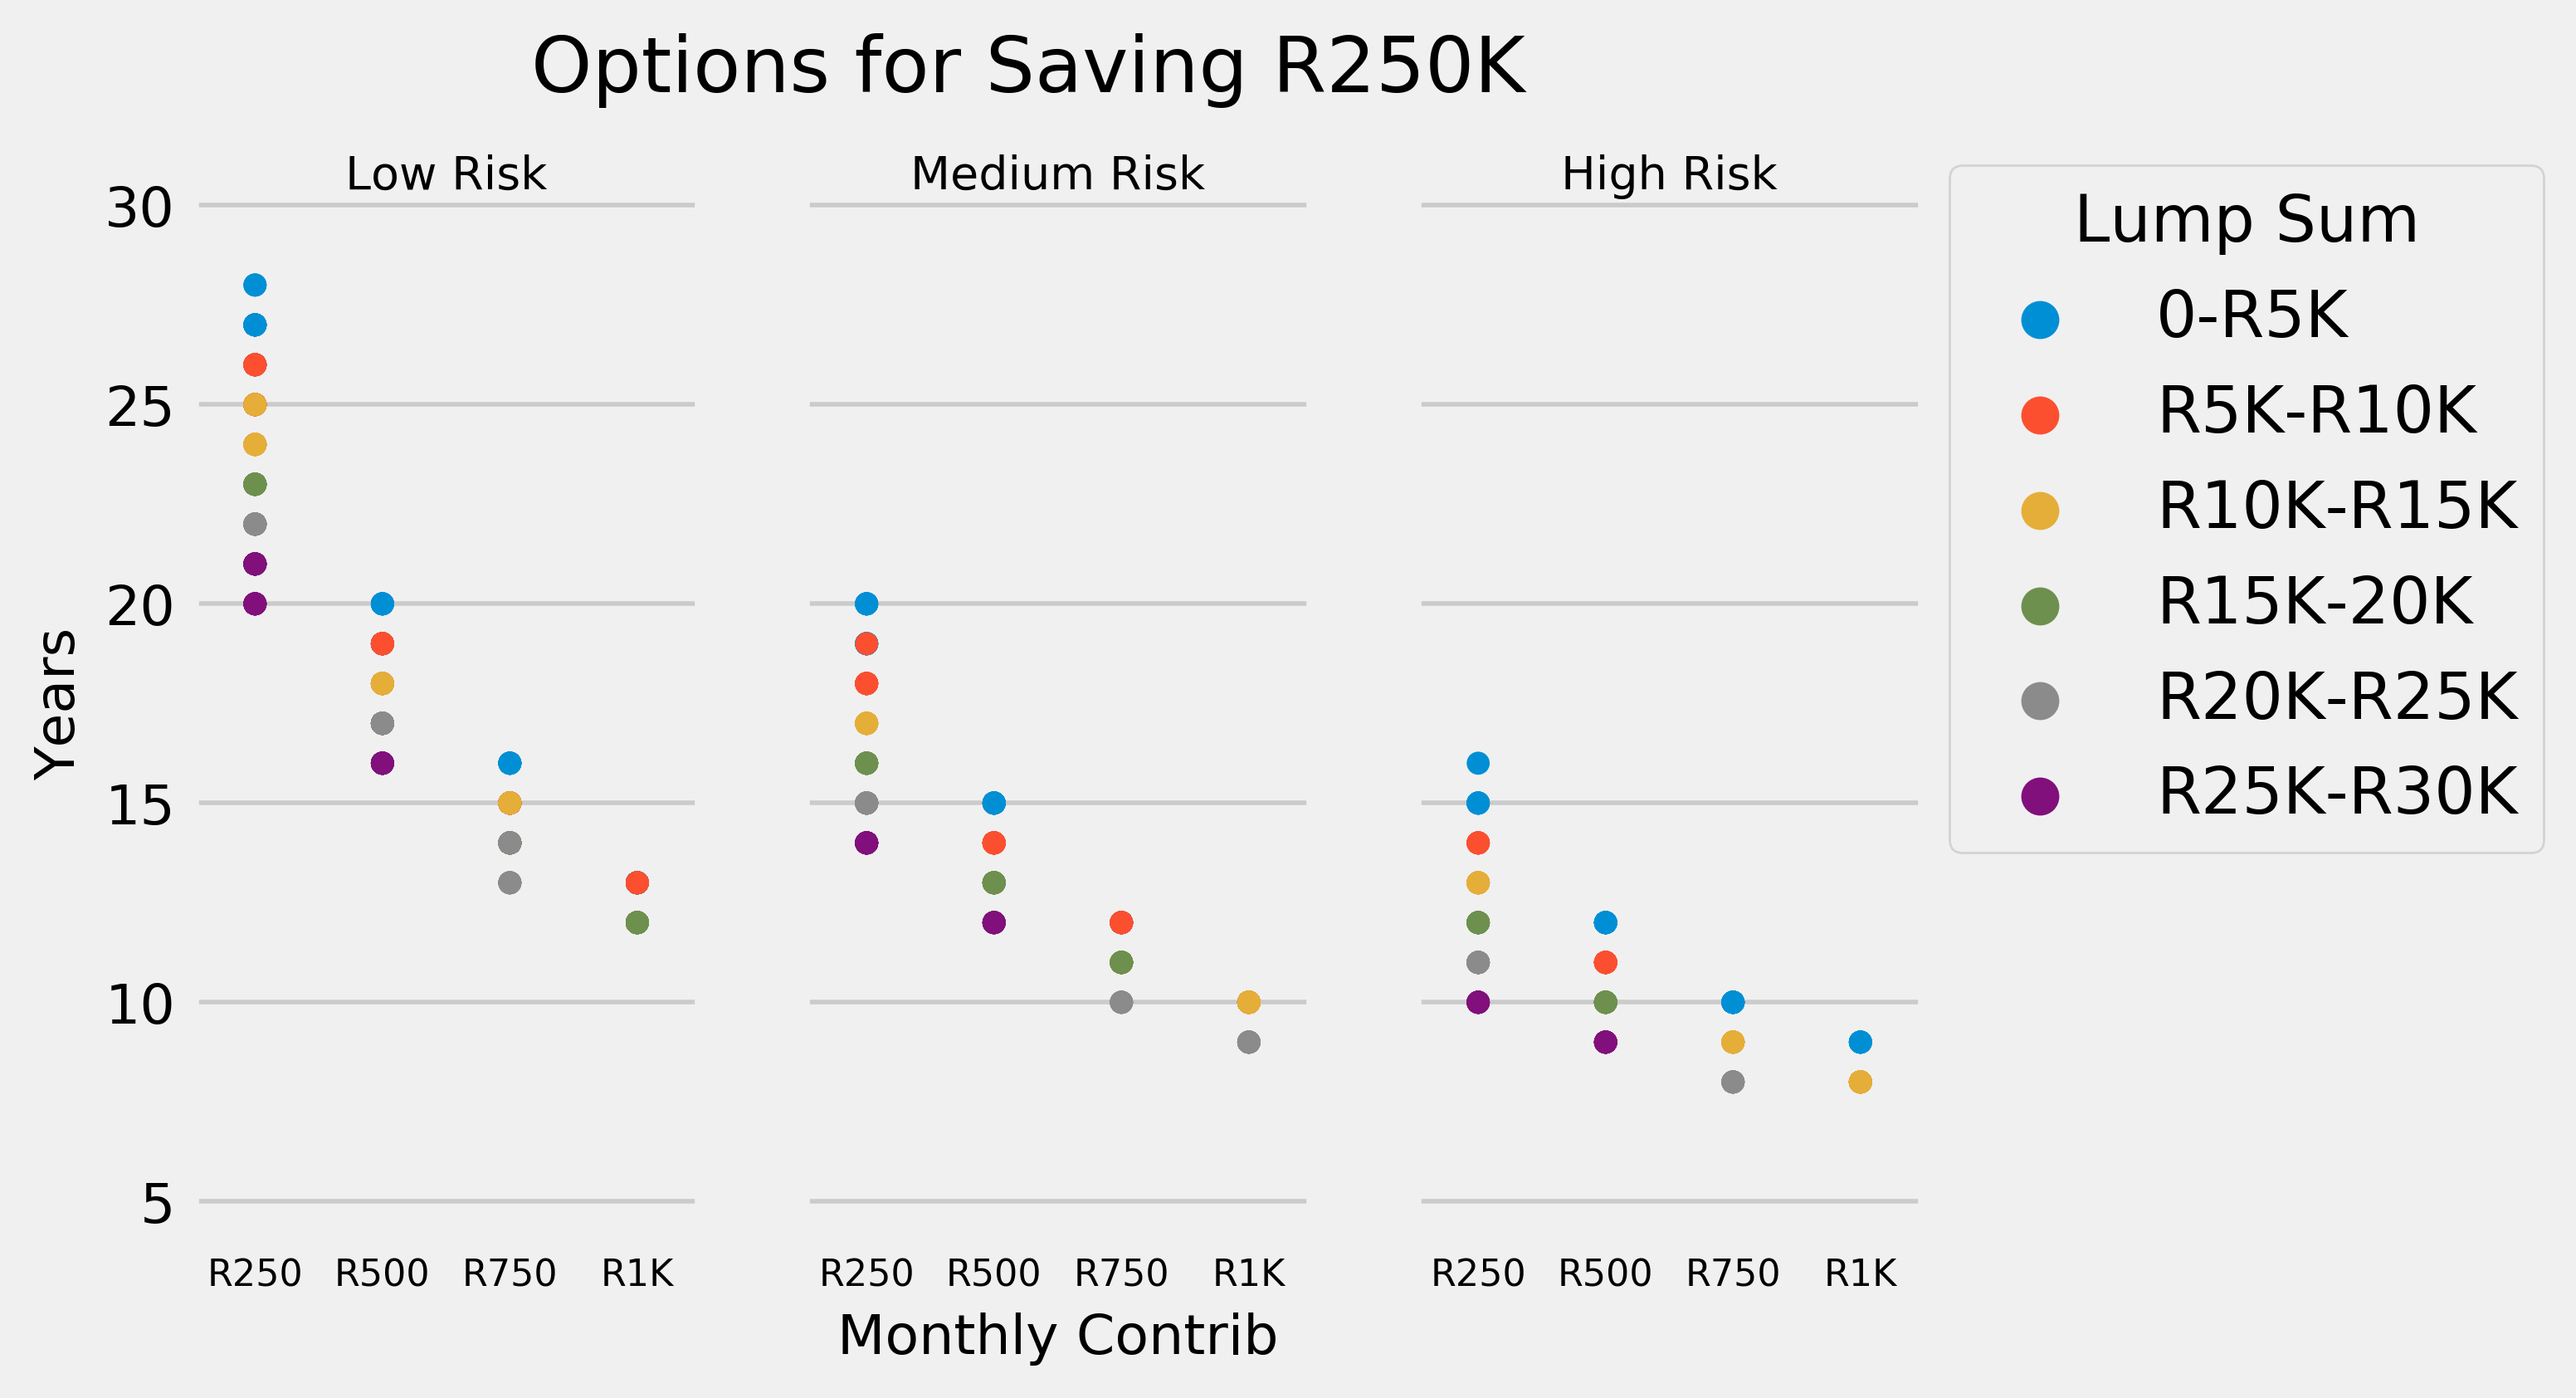

In [204]:
risks = ["low", "medium", "high"]
risk_labels = ["Low", "Medium", "High"]

fig, ax = plt.subplots(1, 3, dpi=400, sharey='row', sharex=True)
width, height = plt.figaspect(1.68)
fig.figsize = (width, height)
fig.subplots_adjust(hspace=0.4)

for ax, risk, risk_label in zip(ax.ravel(), risks, risk_labels):
    df = data[(data.risk==risk) & ((data.fv>=250000) & (data.fv<=275000)) & ((data.monthly==250) | (data.monthly==500) | (data.monthly==750) | (data.monthly==1000))]
    ax = sns.stripplot(x="monthly", y="horizon", hue="lump_sum_cat", data=df, ax=ax)
    
    if risk == "low":        
        ax.set_ylabel("Years", fontdict={"fontsize": 12})
    else:
        ax.set_ylabel("")
    
    if risk == "medium":
        ax.set_xlabel("Monthly Contrib", fontdict={"fontsize": 12})
    else:
        ax.set_xlabel("")
    #ax.tick_params(axis="x", labelrotation=30)
    ax.set_xticklabels(labels=["R250", "R500", "R750", "R1K"], fontdict={"fontsize": 8})
    ax.set_ylim(4, 31)
    ax.set_title(risk_label + " Risk", pad=-5, fontdict={"fontsize": 10})
    handles, labels = ax.get_legend_handles_labels()
    ax.legend().set_visible(False)
    

plt.suptitle("Options for Saving R250K")
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Lump Sum")

## Options for Saving R500K

Saving figure options-saving-500k


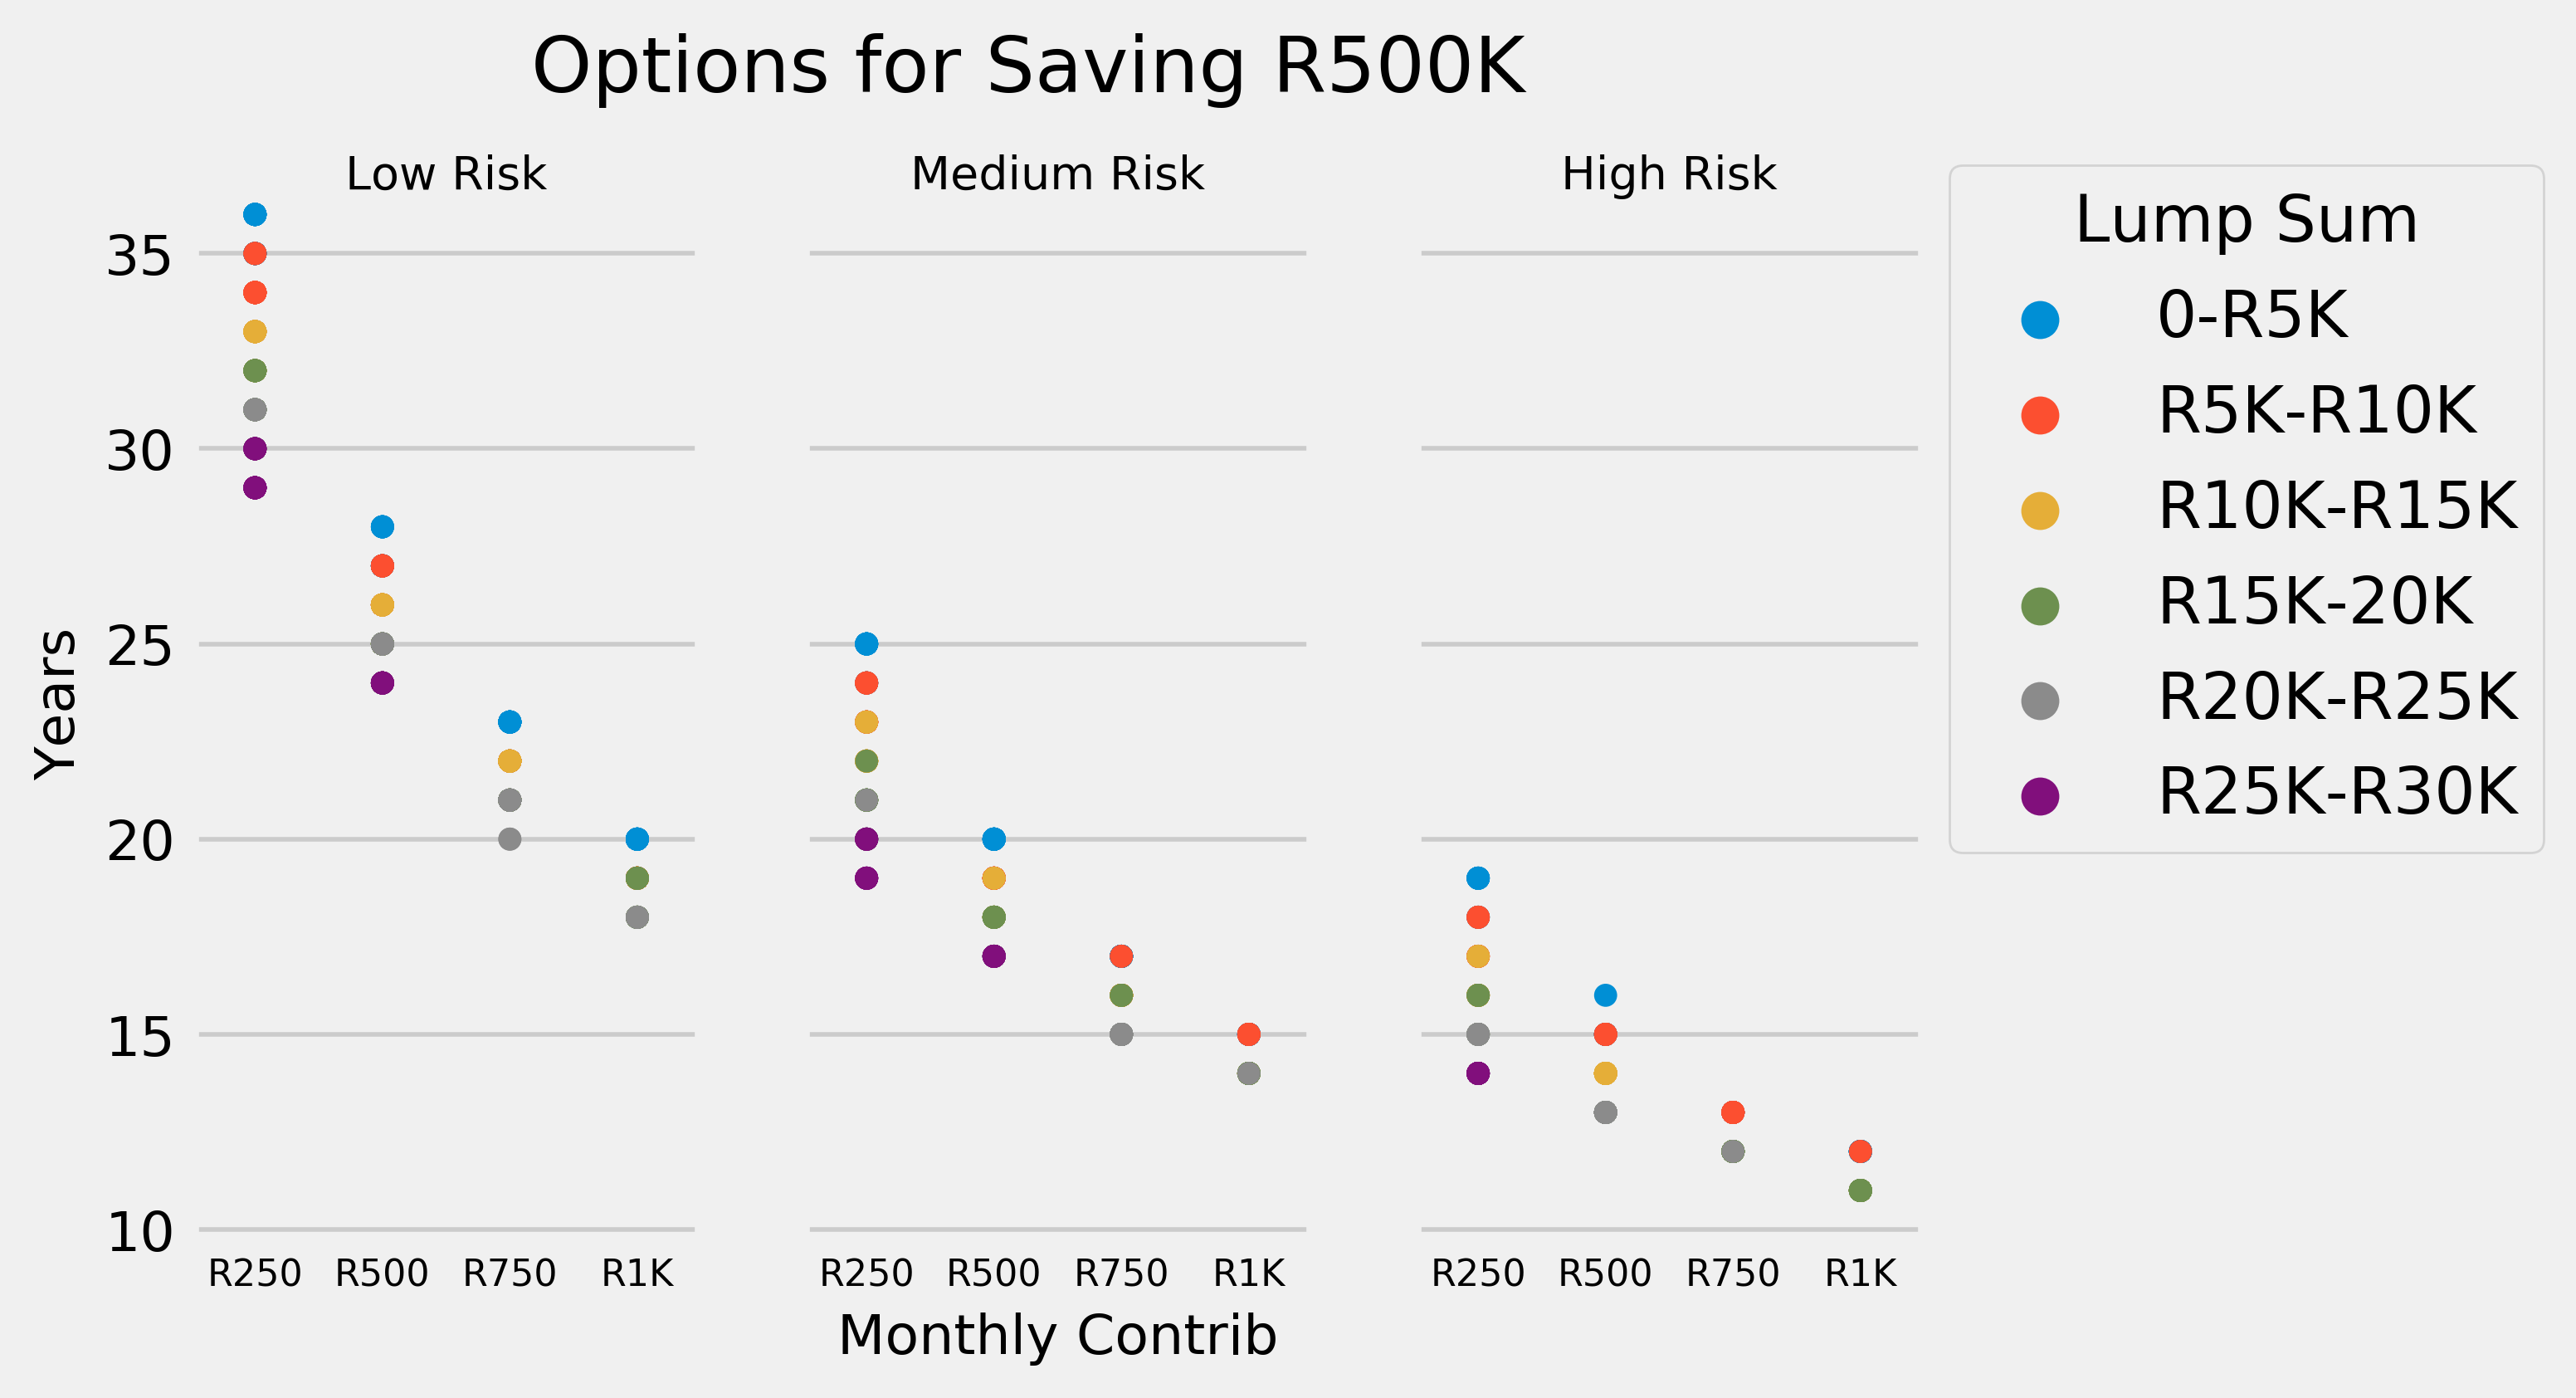

In [171]:
risks = ["low", "medium", "high"]
risk_labels = ["Low", "Medium", "High"]

fig, ax = plt.subplots(1, 3, dpi=400, sharey='row', sharex=True)
width, height = plt.figaspect(1.68)
fig.figsize = (width, height)
fig.subplots_adjust(hspace=0.4)

for ax, risk, risk_label in zip(ax.ravel(), risks, risk_labels):
    df = data[(data.risk==risk) & ((data.fv>=500000) & (data.fv<=550000)) & ((data.monthly==250) | (data.monthly==500) | (data.monthly==750) | (data.monthly==1000))]
    ax = sns.stripplot(x="monthly", y="horizon", hue="lump_sum_cat", data=df, ax=ax)
    
    if risk == "low": 
        ax.set_ylabel("Years", fontdict={"fontsize": 12})
    else:
        ax.set_ylabel("")
    
    if risk == "medium":
        ax.set_xlabel("Monthly Contrib", fontdict={"fontsize": 12})
    else:
        ax.set_xlabel("")
    #ax.tick_params(axis="x", labelrotation=30)
    ax.set_xticklabels(labels=["R250", "R500", "R750", "R1K"], fontdict={"fontsize": 8})
    ax.set_title(risk_label + " Risk", pad=-5, fontdict={"fontsize": 10})
    handles, labels = ax.get_legend_handles_labels()
    ax.legend().set_visible(False)
    

plt.suptitle("Options for Saving R500K")
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Lump Sum")

## Options for Saving R1M

Saving figure options-saving-1M


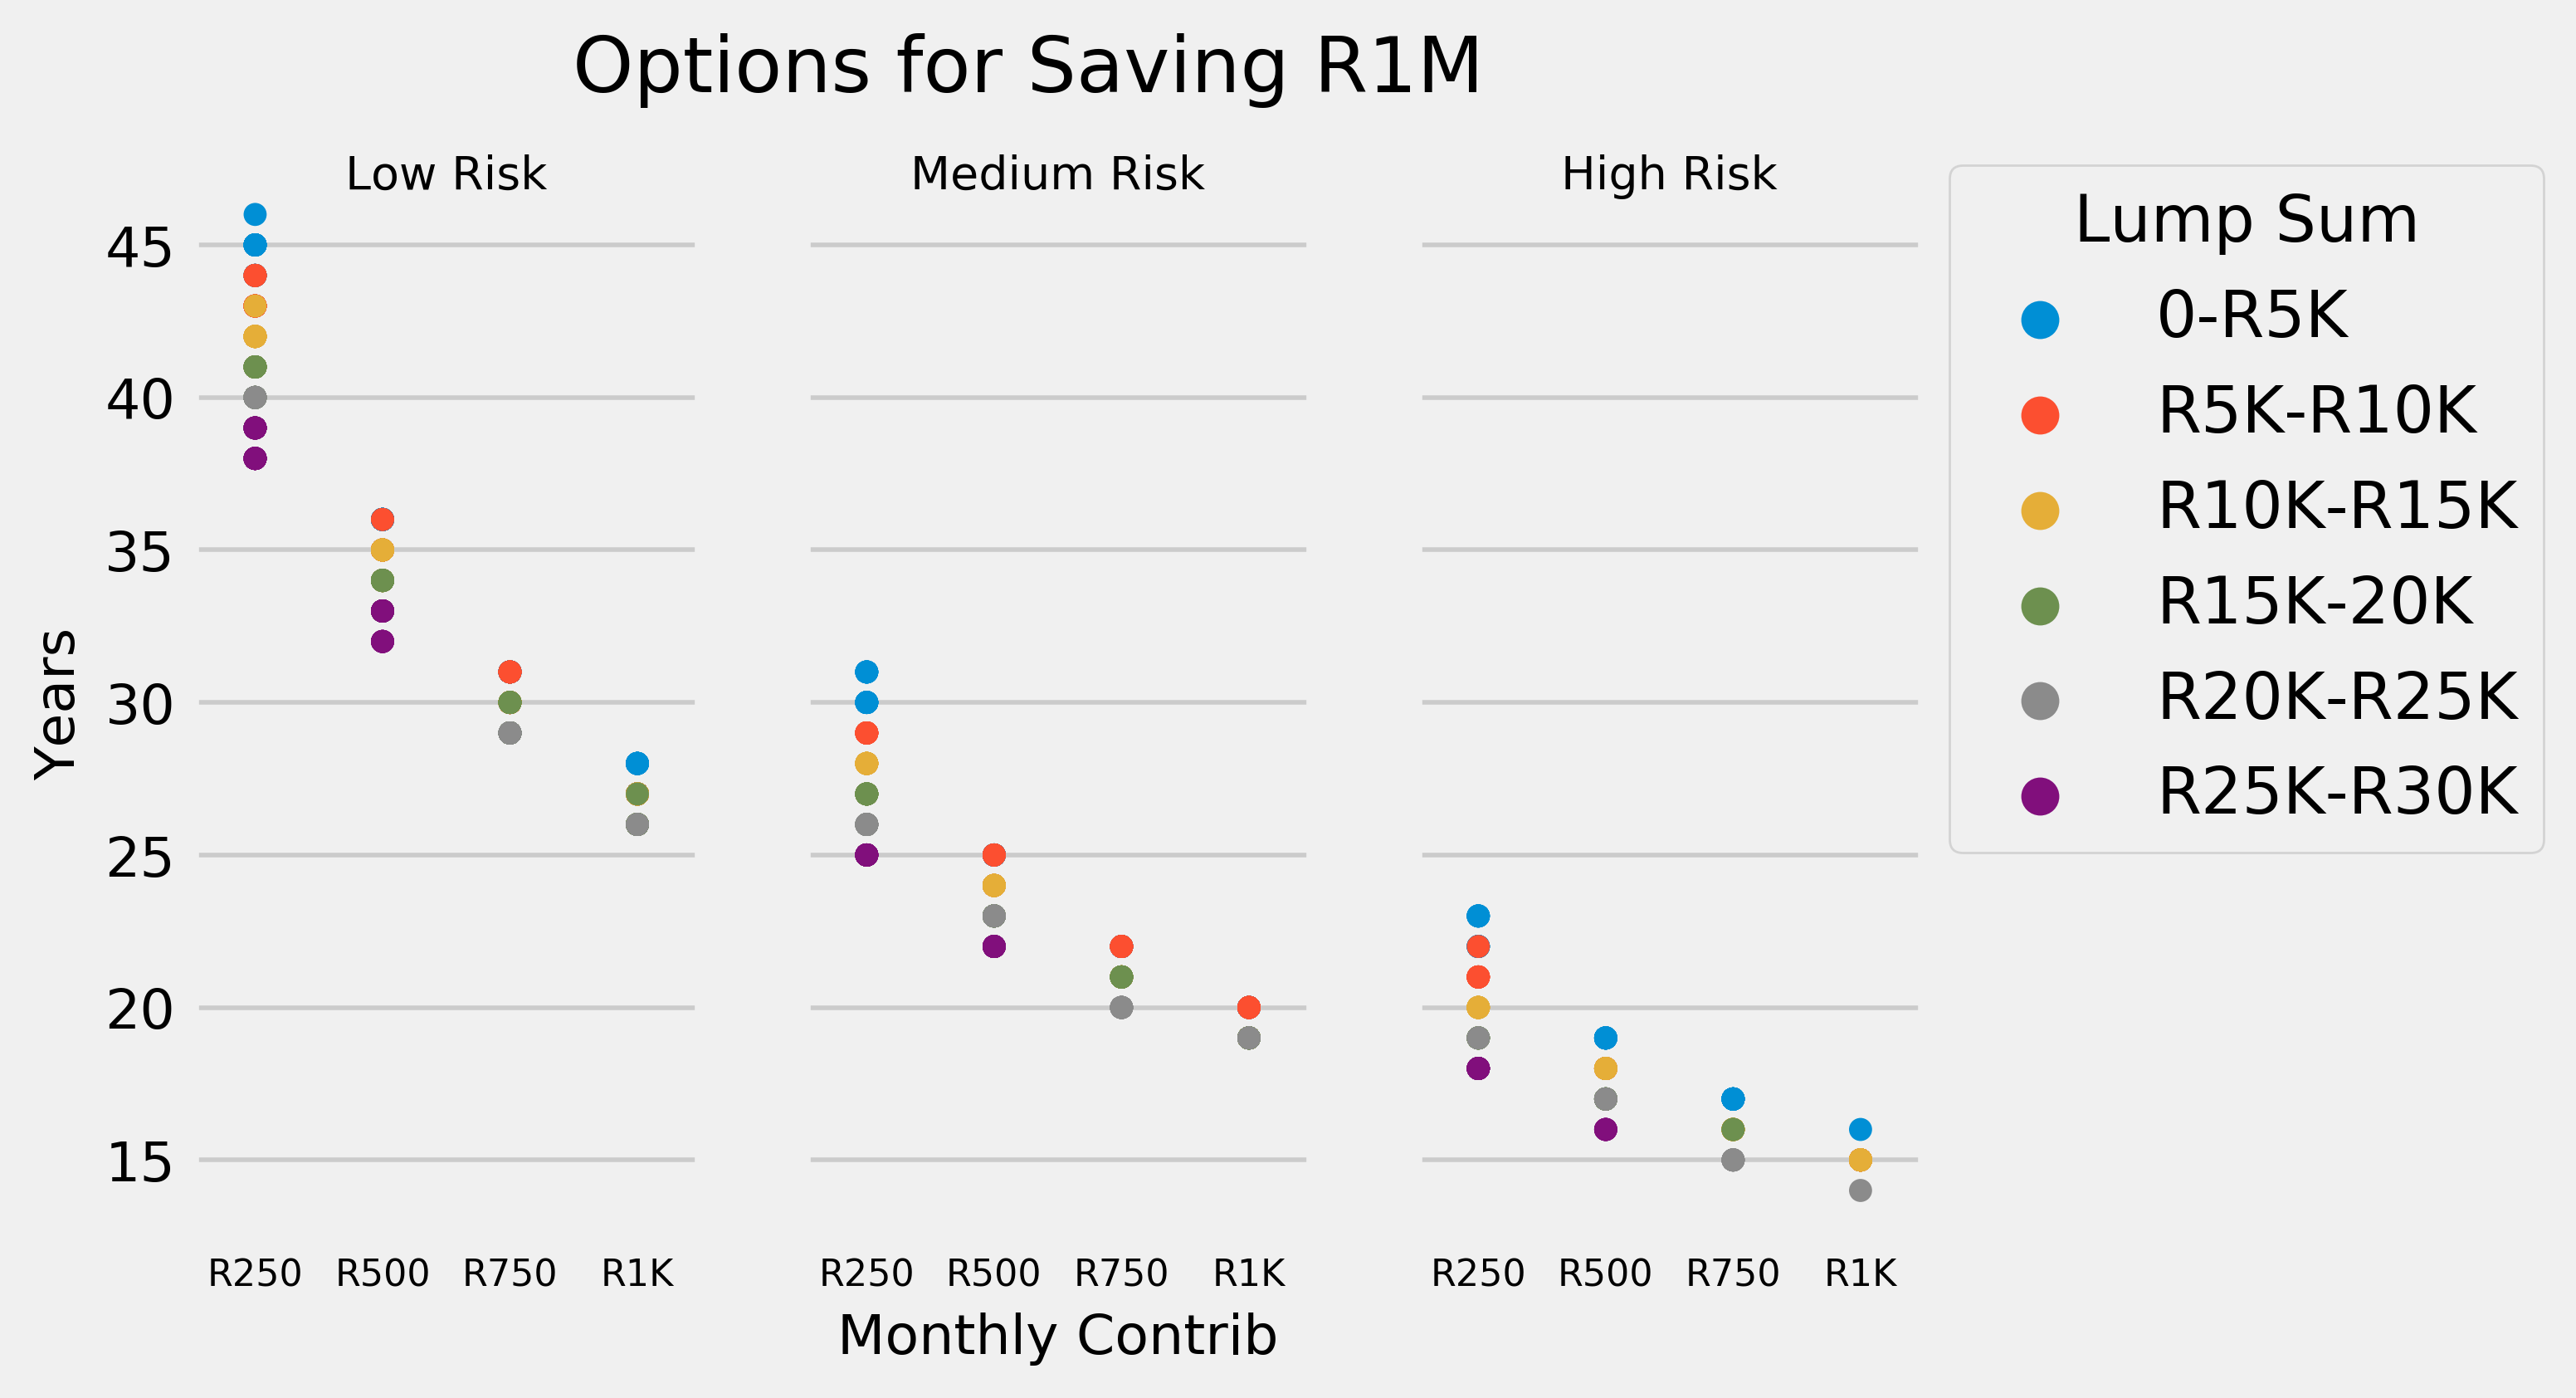

In [172]:
risks = ["low", "medium", "high"]
risk_labels = ["Low", "Medium", "High"]

fig, ax = plt.subplots(1, 3, dpi=400, sharey='row', sharex=True)
width, height = plt.figaspect(1.68)
fig.figsize = (width, height)
fig.subplots_adjust(hspace=0.4)

for ax, risk, risk_label in zip(ax.ravel(), risks, risk_labels):
    df = data[(data.risk==risk) & ((data.fv>=1000000) & (data.fv<=1100000)) & ((data.monthly==250) | (data.monthly==500) | (data.monthly==750) | (data.monthly==1000))]
    ax = sns.stripplot(x="monthly", y="horizon", hue="lump_sum_cat", data=df, ax=ax)
    
    if risk == "low":        
        ax.set_ylabel("Years", fontdict={"fontsize": 12})
    else:
        ax.set_ylabel("")
    
    if risk == "medium":
        ax.set_xlabel("Monthly Contrib", fontdict={"fontsize": 12})
    else:
        ax.set_xlabel("")
    #ax.tick_params(axis="x", labelrotation=30)
    ax.set_xticklabels(labels=["R250", "R500", "R750", "R1K"], fontdict={"fontsize": 8})
    ax.set_title(risk_label + " Risk", pad=-5, fontdict={"fontsize": 10})
    handles, labels = ax.get_legend_handles_labels()
    ax.legend().set_visible(False)
    

plt.suptitle("Options for Saving R1M")
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Lump Sum")

## Options for Saving R2M

Saving figure options-saving-2M


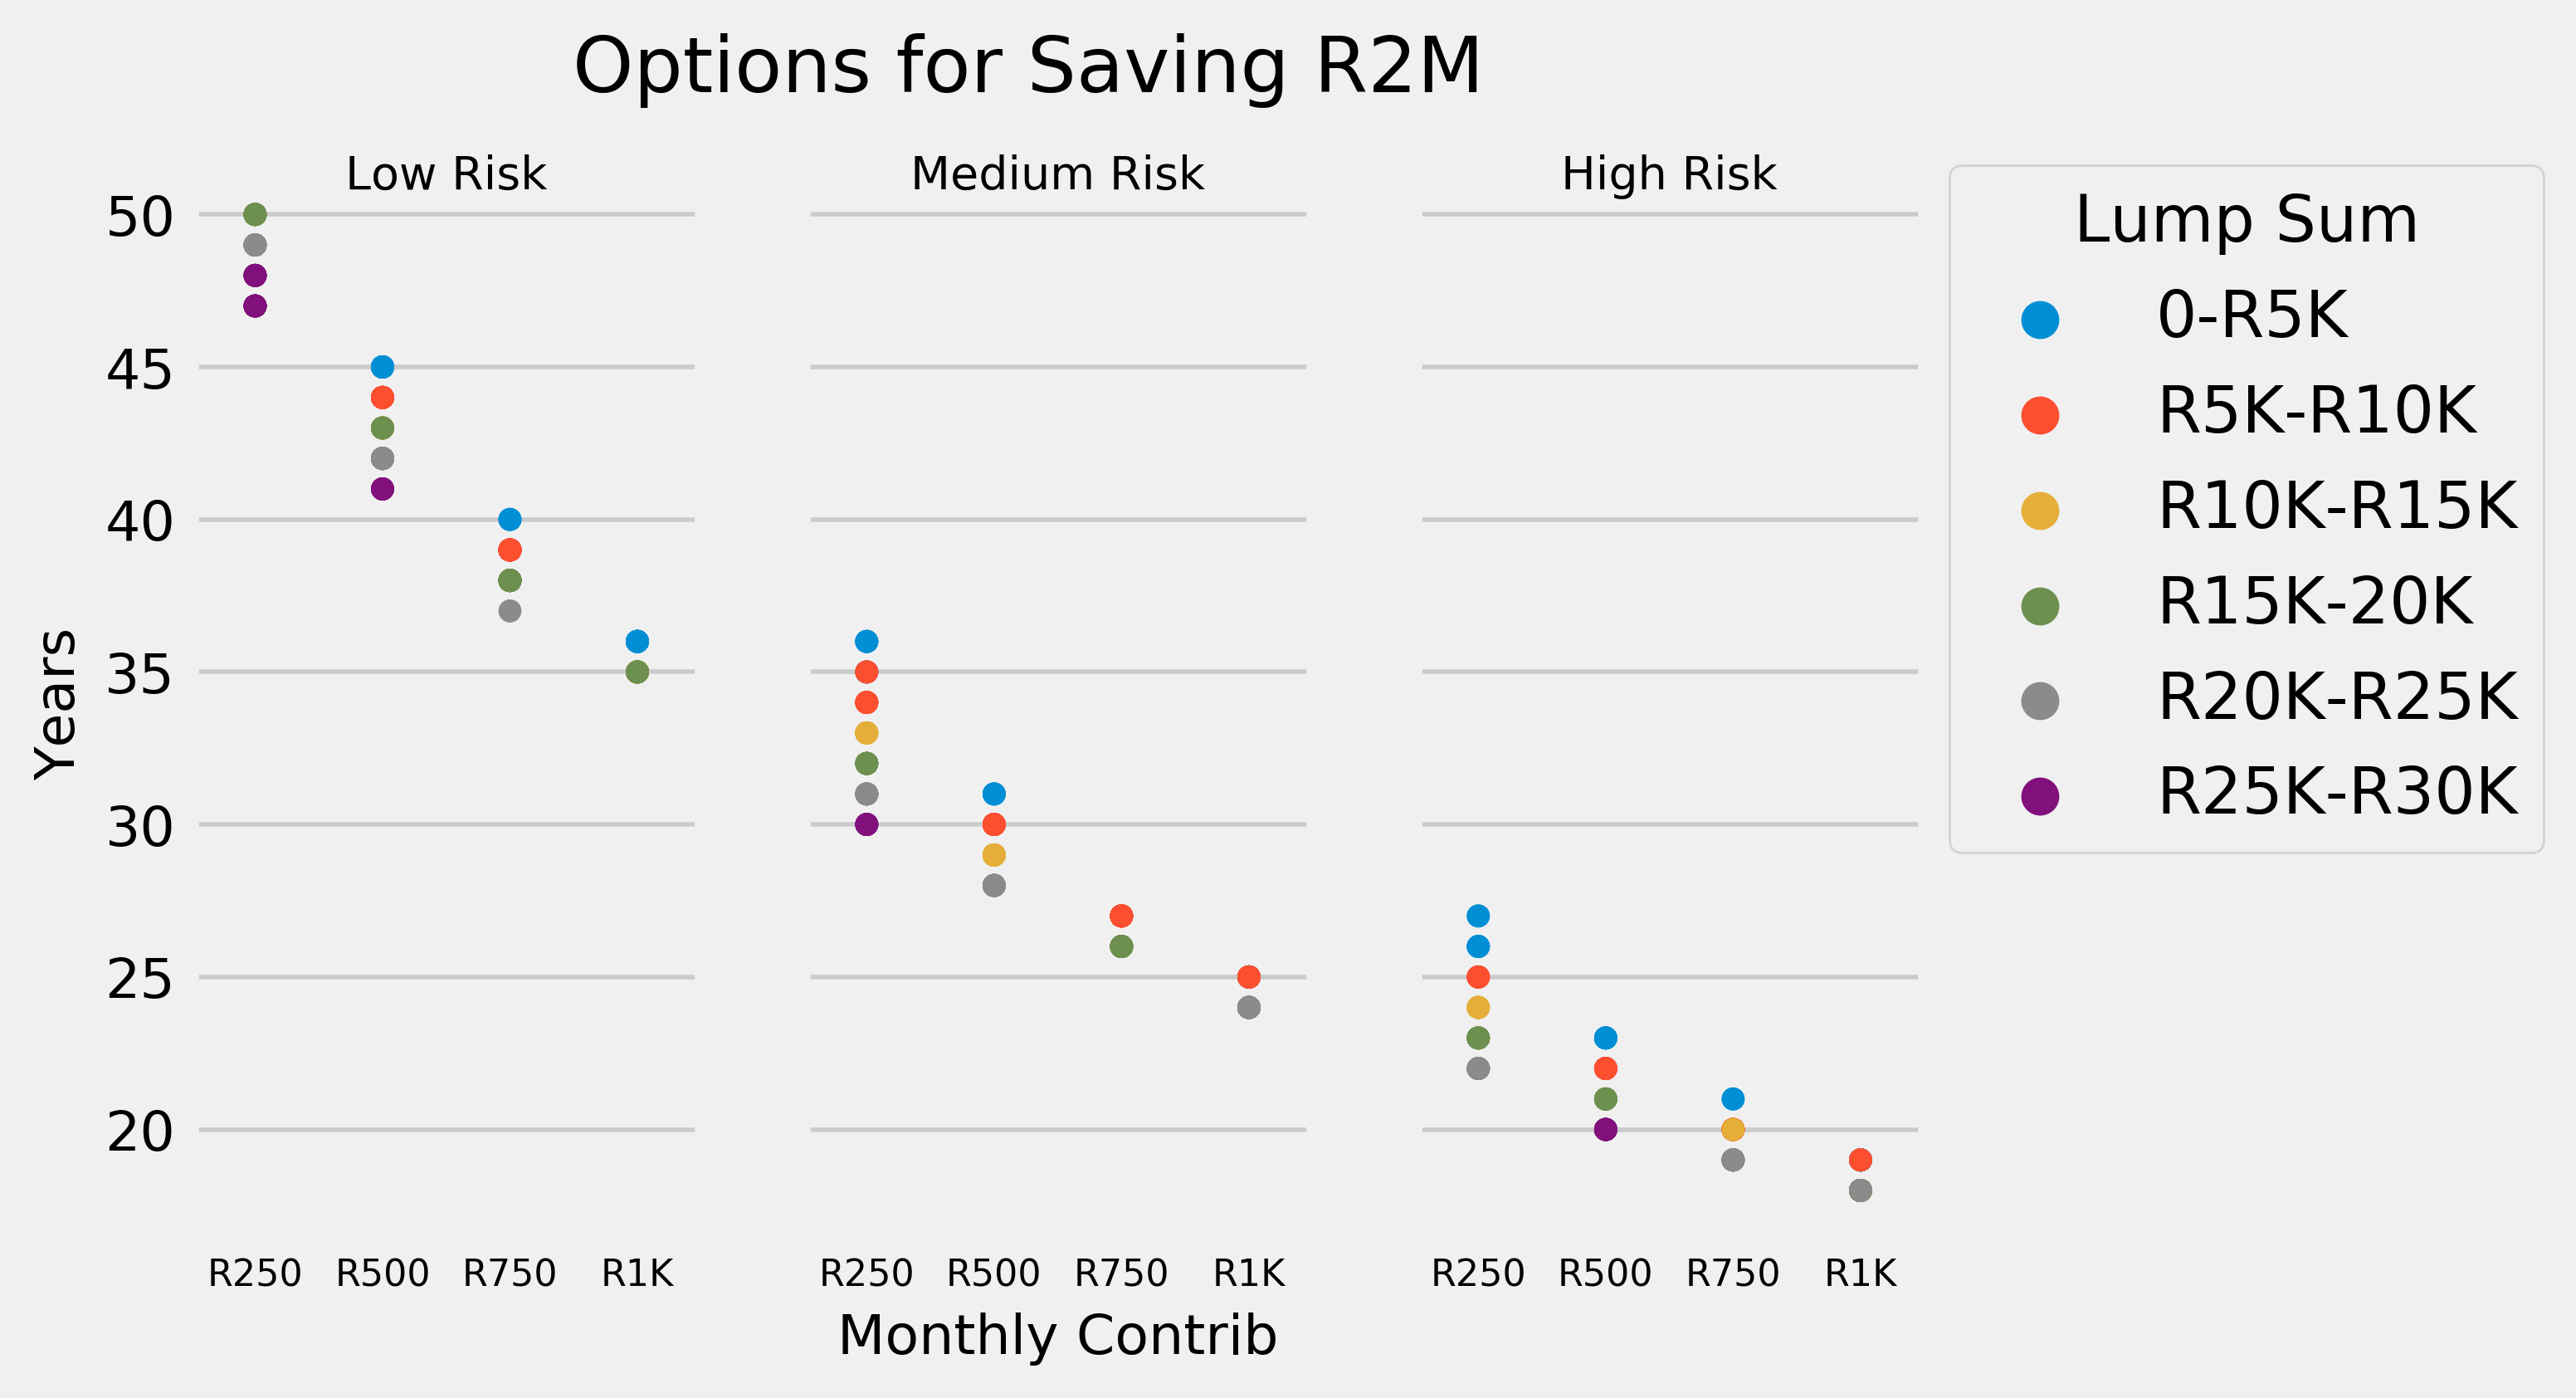

In [173]:
risks = ["low", "medium", "high"]
risk_labels = ["Low", "Medium", "High"]

fig, ax = plt.subplots(1, 3, dpi=400, sharey='row', sharex=True)
width, height = plt.figaspect(1.68)
fig.figsize = (width, height)
fig.subplots_adjust(hspace=0.4)

for ax, risk, risk_label in zip(ax.ravel(), risks, risk_labels):
    df = data[(data.risk==risk) & ((data.fv>=2000000) & (data.fv<=2100000)) & ((data.monthly==250) | (data.monthly==500) | (data.monthly==750) | (data.monthly==1000))]
    ax = sns.stripplot(x="monthly", y="horizon", hue="lump_sum_cat", data=df, ax=ax)
    
    
    if risk == "low":        
        ax.set_ylabel("Years", fontdict={"fontsize": 12})
    else:
        ax.set_ylabel("")
    
    if risk == "medium":
        ax.set_xlabel("Monthly Contrib", fontdict={"fontsize": 12})
    else:
        ax.set_xlabel("")
    #ax.tick_params(axis="x", labelrotation=30)
    ax.set_xticklabels(labels=["R250", "R500", "R750", "R1K"], fontdict={"fontsize": 8})
    ax.set_title(risk_label + " Risk", pad=-5, fontdict={"fontsize": 10})
    handles, labels = ax.get_legend_handles_labels()
    ax.legend().set_visible(False)
    

plt.suptitle("Options for Saving R2M")
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Lump Sum")

## Options for Saving R5M

Saving figure options-saving-2M


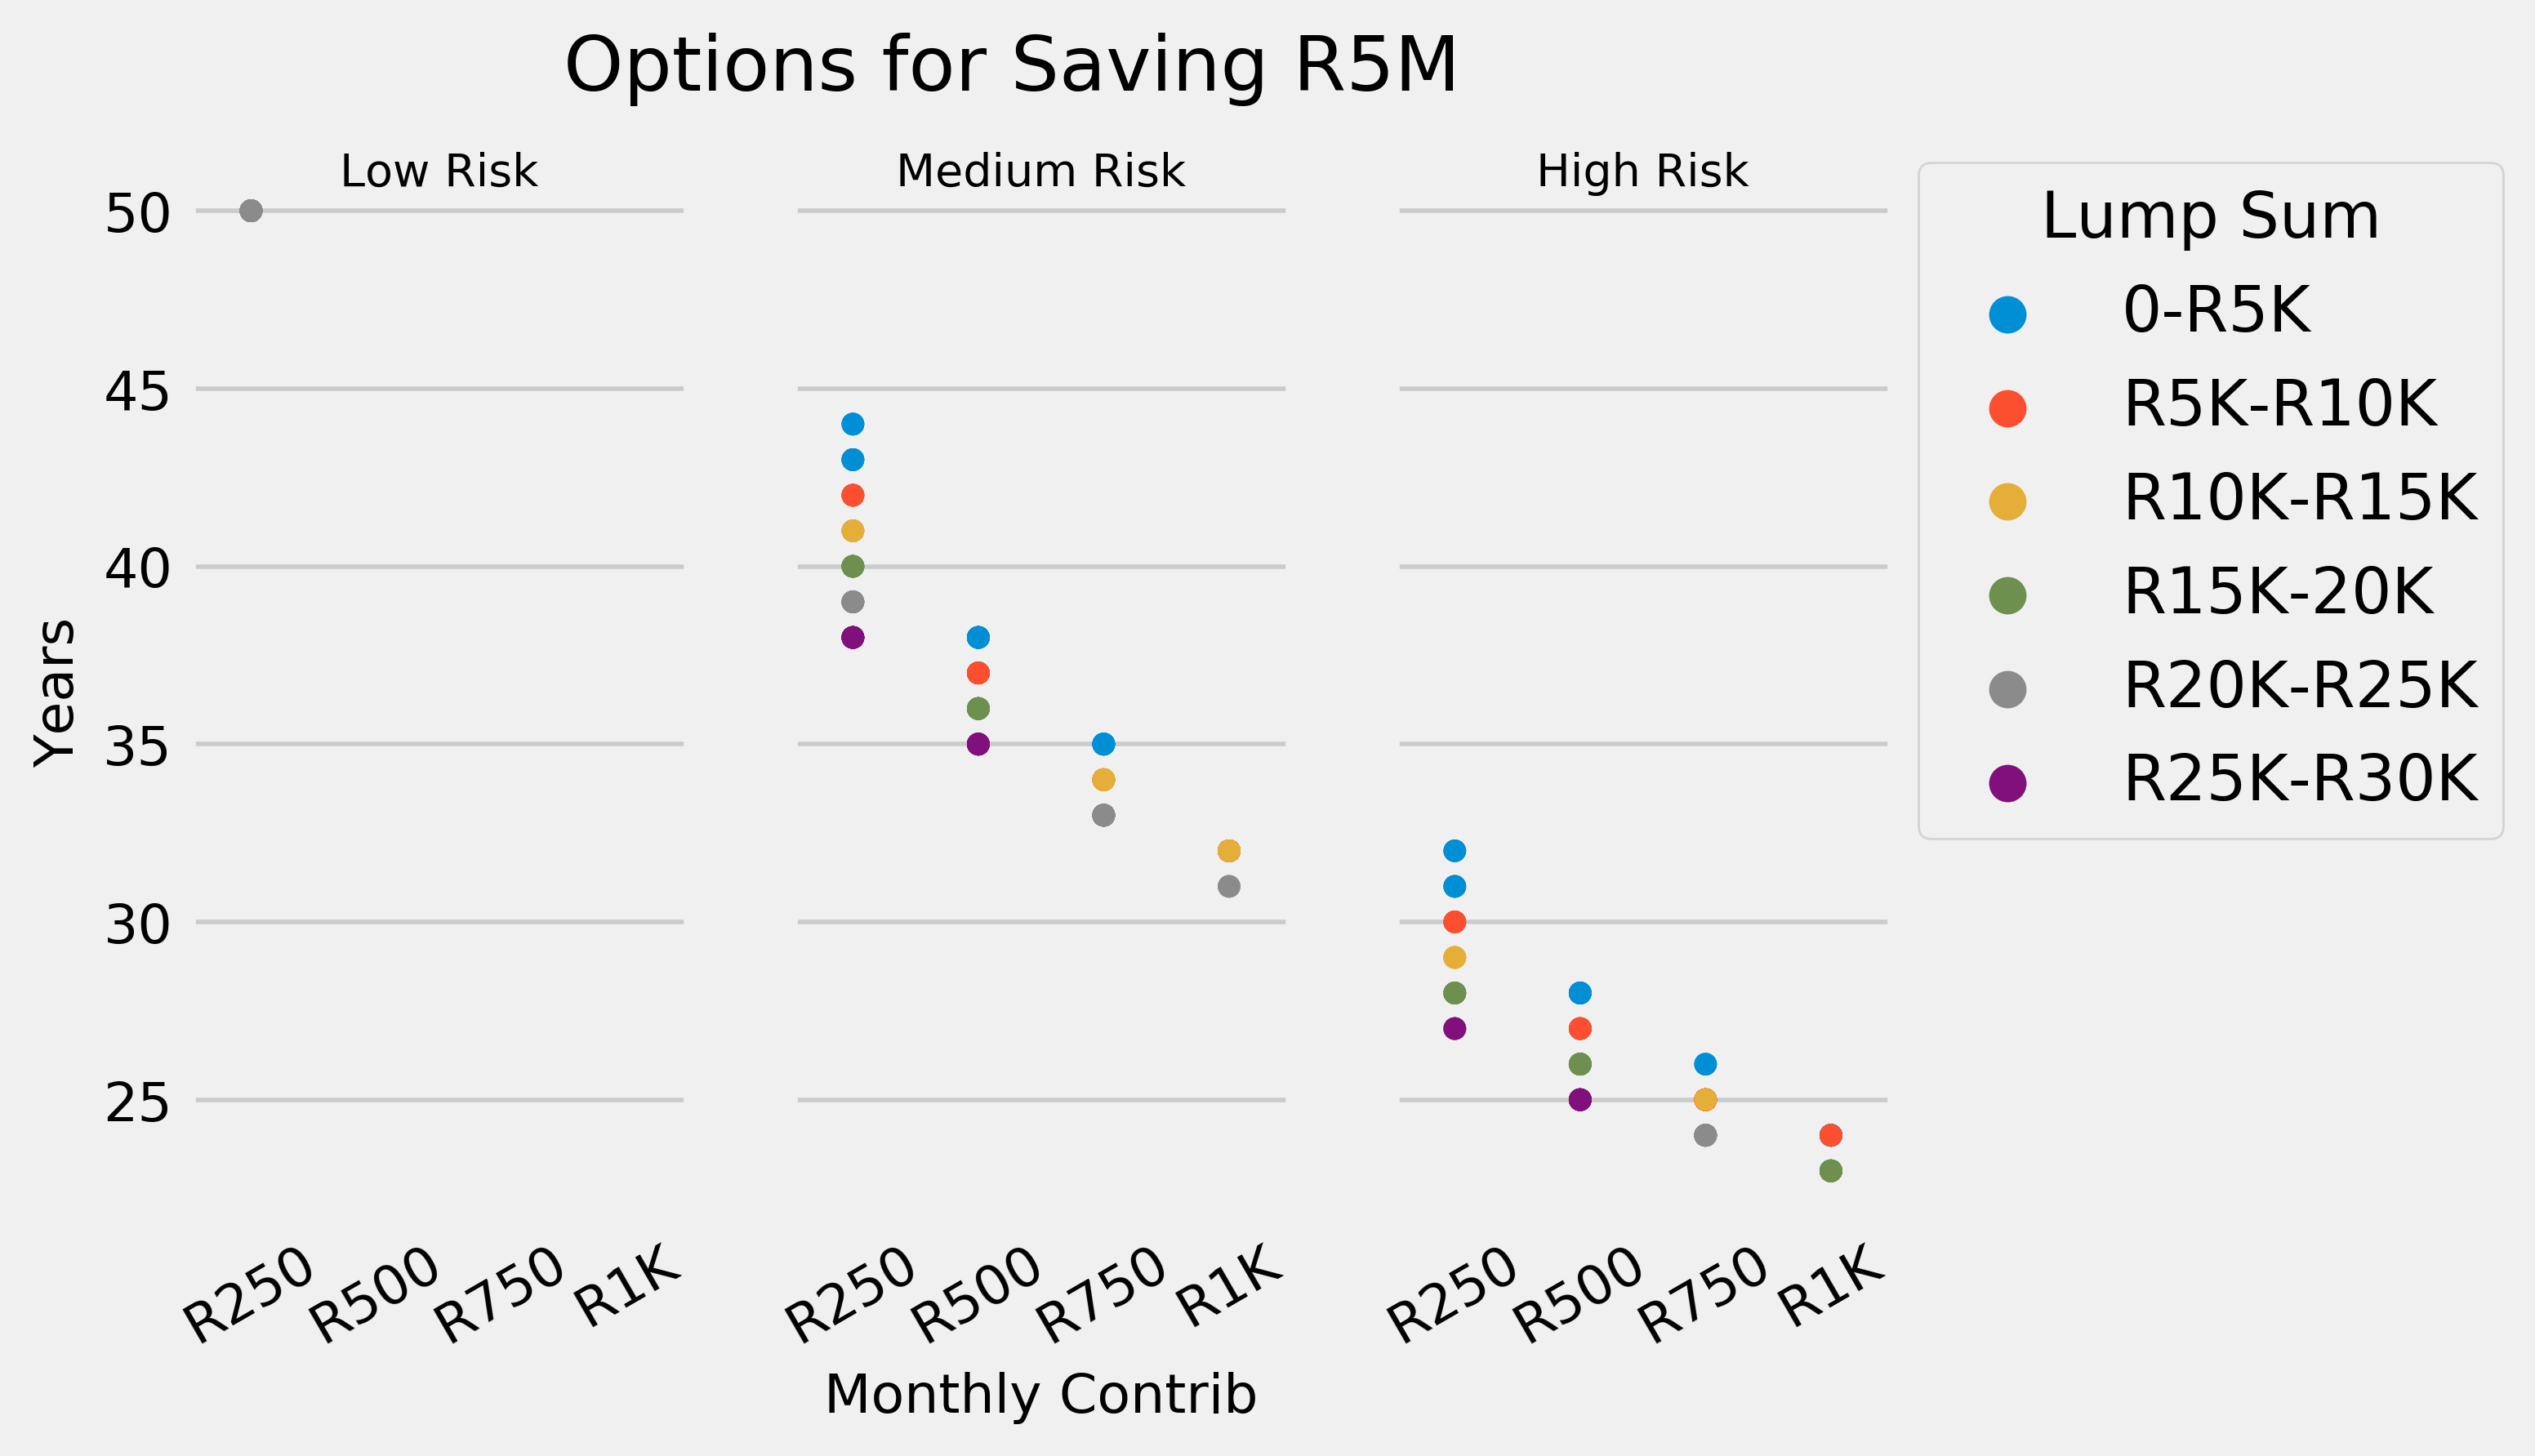

In [174]:
risks = ["low", "medium", "high"]
risk_labels = ["Low", "Medium", "High"]

fig, ax = plt.subplots(1, 3, dpi=400, sharey='row', sharex=True)
width, height = plt.figaspect(1.68)
fig.figsize = (width, height)
fig.subplots_adjust(hspace=0.4)

for ax, risk, risk_label in zip(ax.ravel(), risks, risk_labels):
    df = data[(data.risk==risk) & ((data.fv>=5000000) & (data.fv<=5200000)) & ((data.monthly==250) | (data.monthly==500) | (data.monthly==750) | (data.monthly==1000))]
    ax = sns.stripplot(x="monthly", y="horizon", hue="lump_sum_cat", data=df, ax=ax)
     
    if risk == "low":        
        ax.set_ylabel("Years", fontdict={"fontsize": 12})
    else:
        ax.set_ylabel("")
    
    if risk == "medium":
        ax.set_xlabel("Monthly Contrib", fontdict={"fontsize": 12})
    else:
        ax.set_xlabel("")
    ax.tick_params(axis="x", labelrotation=30)
    ax.set_xticklabels(labels=["R250", "R500", "R750", "R1K"])
    ax.set_title(risk_label + " Risk", pad=-5, fontdict={"fontsize": 10}) 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend().set_visible(False)
    

plt.suptitle("Options for Saving R5M")
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Lump Sum")

## Options for Saving R10M

C:\Users\doron\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


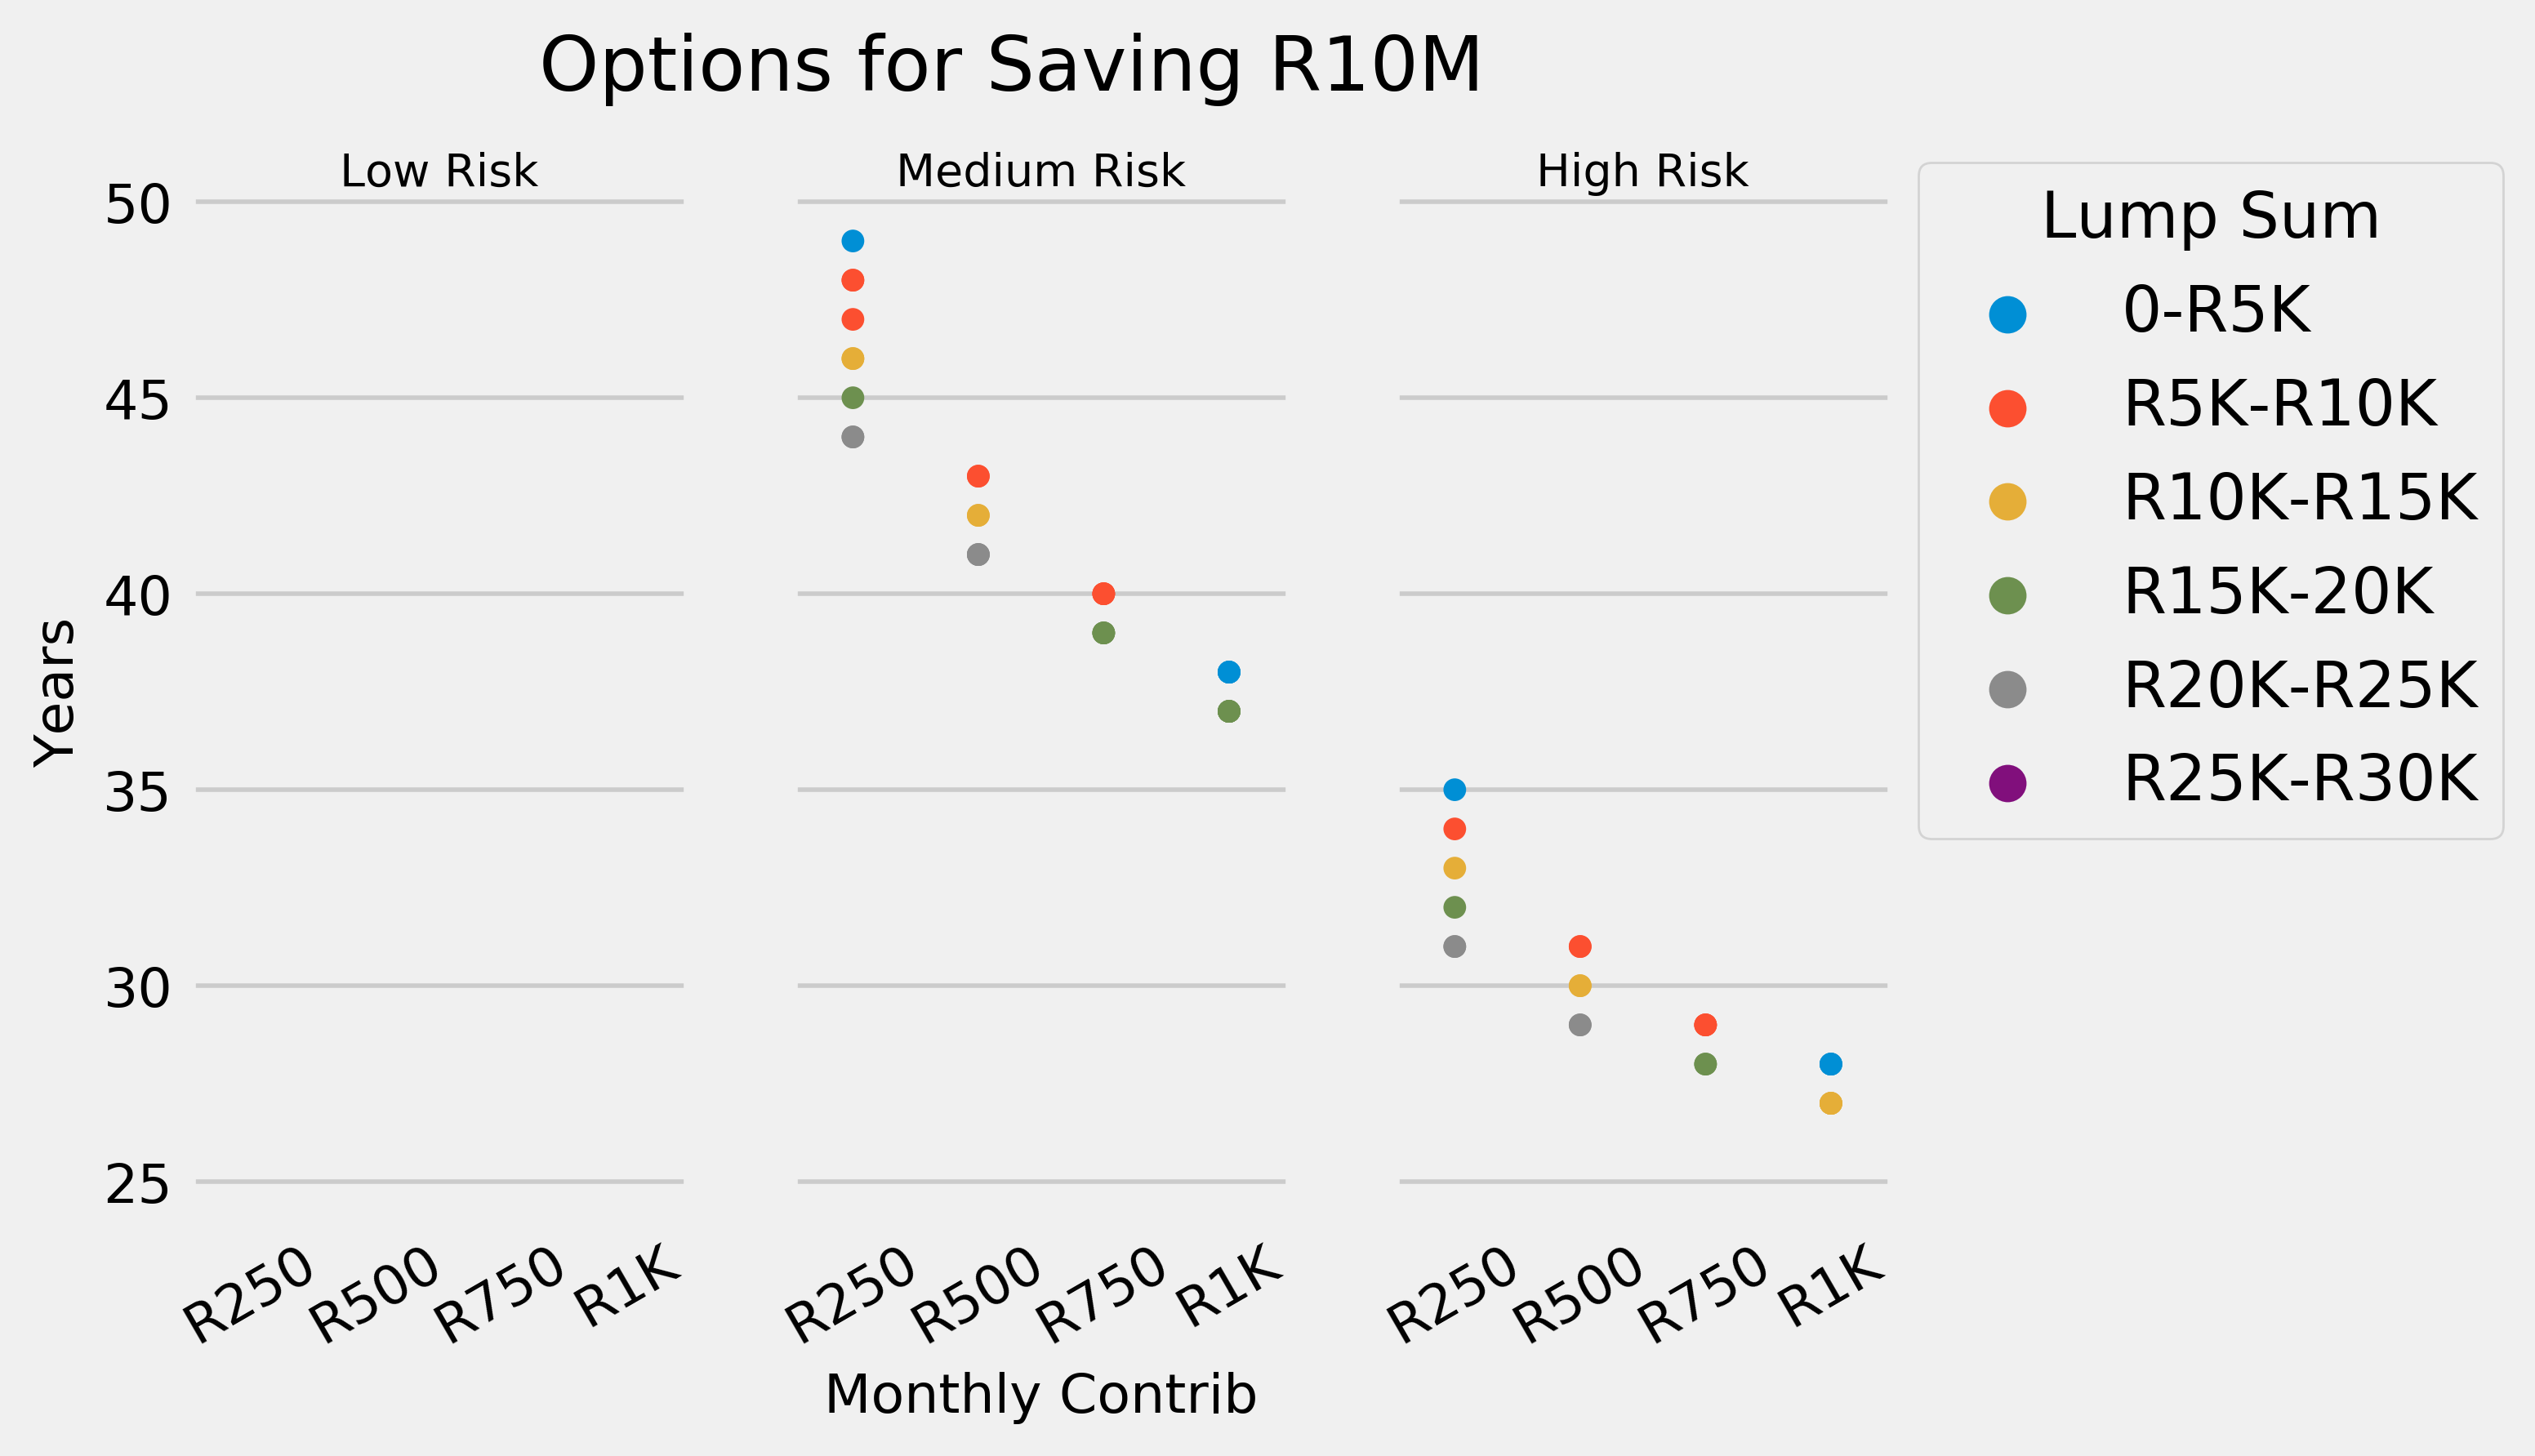

In [200]:
risks = ["low", "medium", "high"]
risk_labels = ["Low", "Medium", "High"]

fig, ax = plt.subplots(1, 3, dpi=400, sharey='row', sharex=True)
width, height = plt.figaspect(1.68)
fig.figsize = (width, height)
fig.subplots_adjust(hspace=0.4)

for ax, risk, risk_label in zip(ax.ravel(), risks, risk_labels):
    df = data[(data.risk==risk) & ((data.fv>=10000000) & (data.fv<=10100000)) & ((data.monthly==250) | (data.monthly==500) | (data.monthly==750) | (data.monthly==1000))]
    ax = sns.stripplot(x="monthly", y="horizon", hue="lump_sum_cat", data=df, ax=ax)
    
    
    if risk == "low":        
        ax.set_ylabel("Years", fontdict={"fontsize": 12})
    else:
        ax.set_ylabel("")
    
    if risk == "medium":
        ax.set_xlabel("Monthly Contrib", fontdict={"fontsize": 12})
    else:
        ax.set_xlabel("")
    ax.tick_params(axis="x", labelrotation=30)
    ax.set_xticklabels(labels=["R250", "R500", "R750", "R1K"])
    ax.set_ylim(24, 51)
    ax.set_title(risk_label + " Risk", pad=-5, fontdict={"fontsize": 10}) 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend().set_visible(False)
    

plt.suptitle("Options for Saving R10M")
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Lump Sum")

## Options for Saving R20M

C:\Users\doron\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


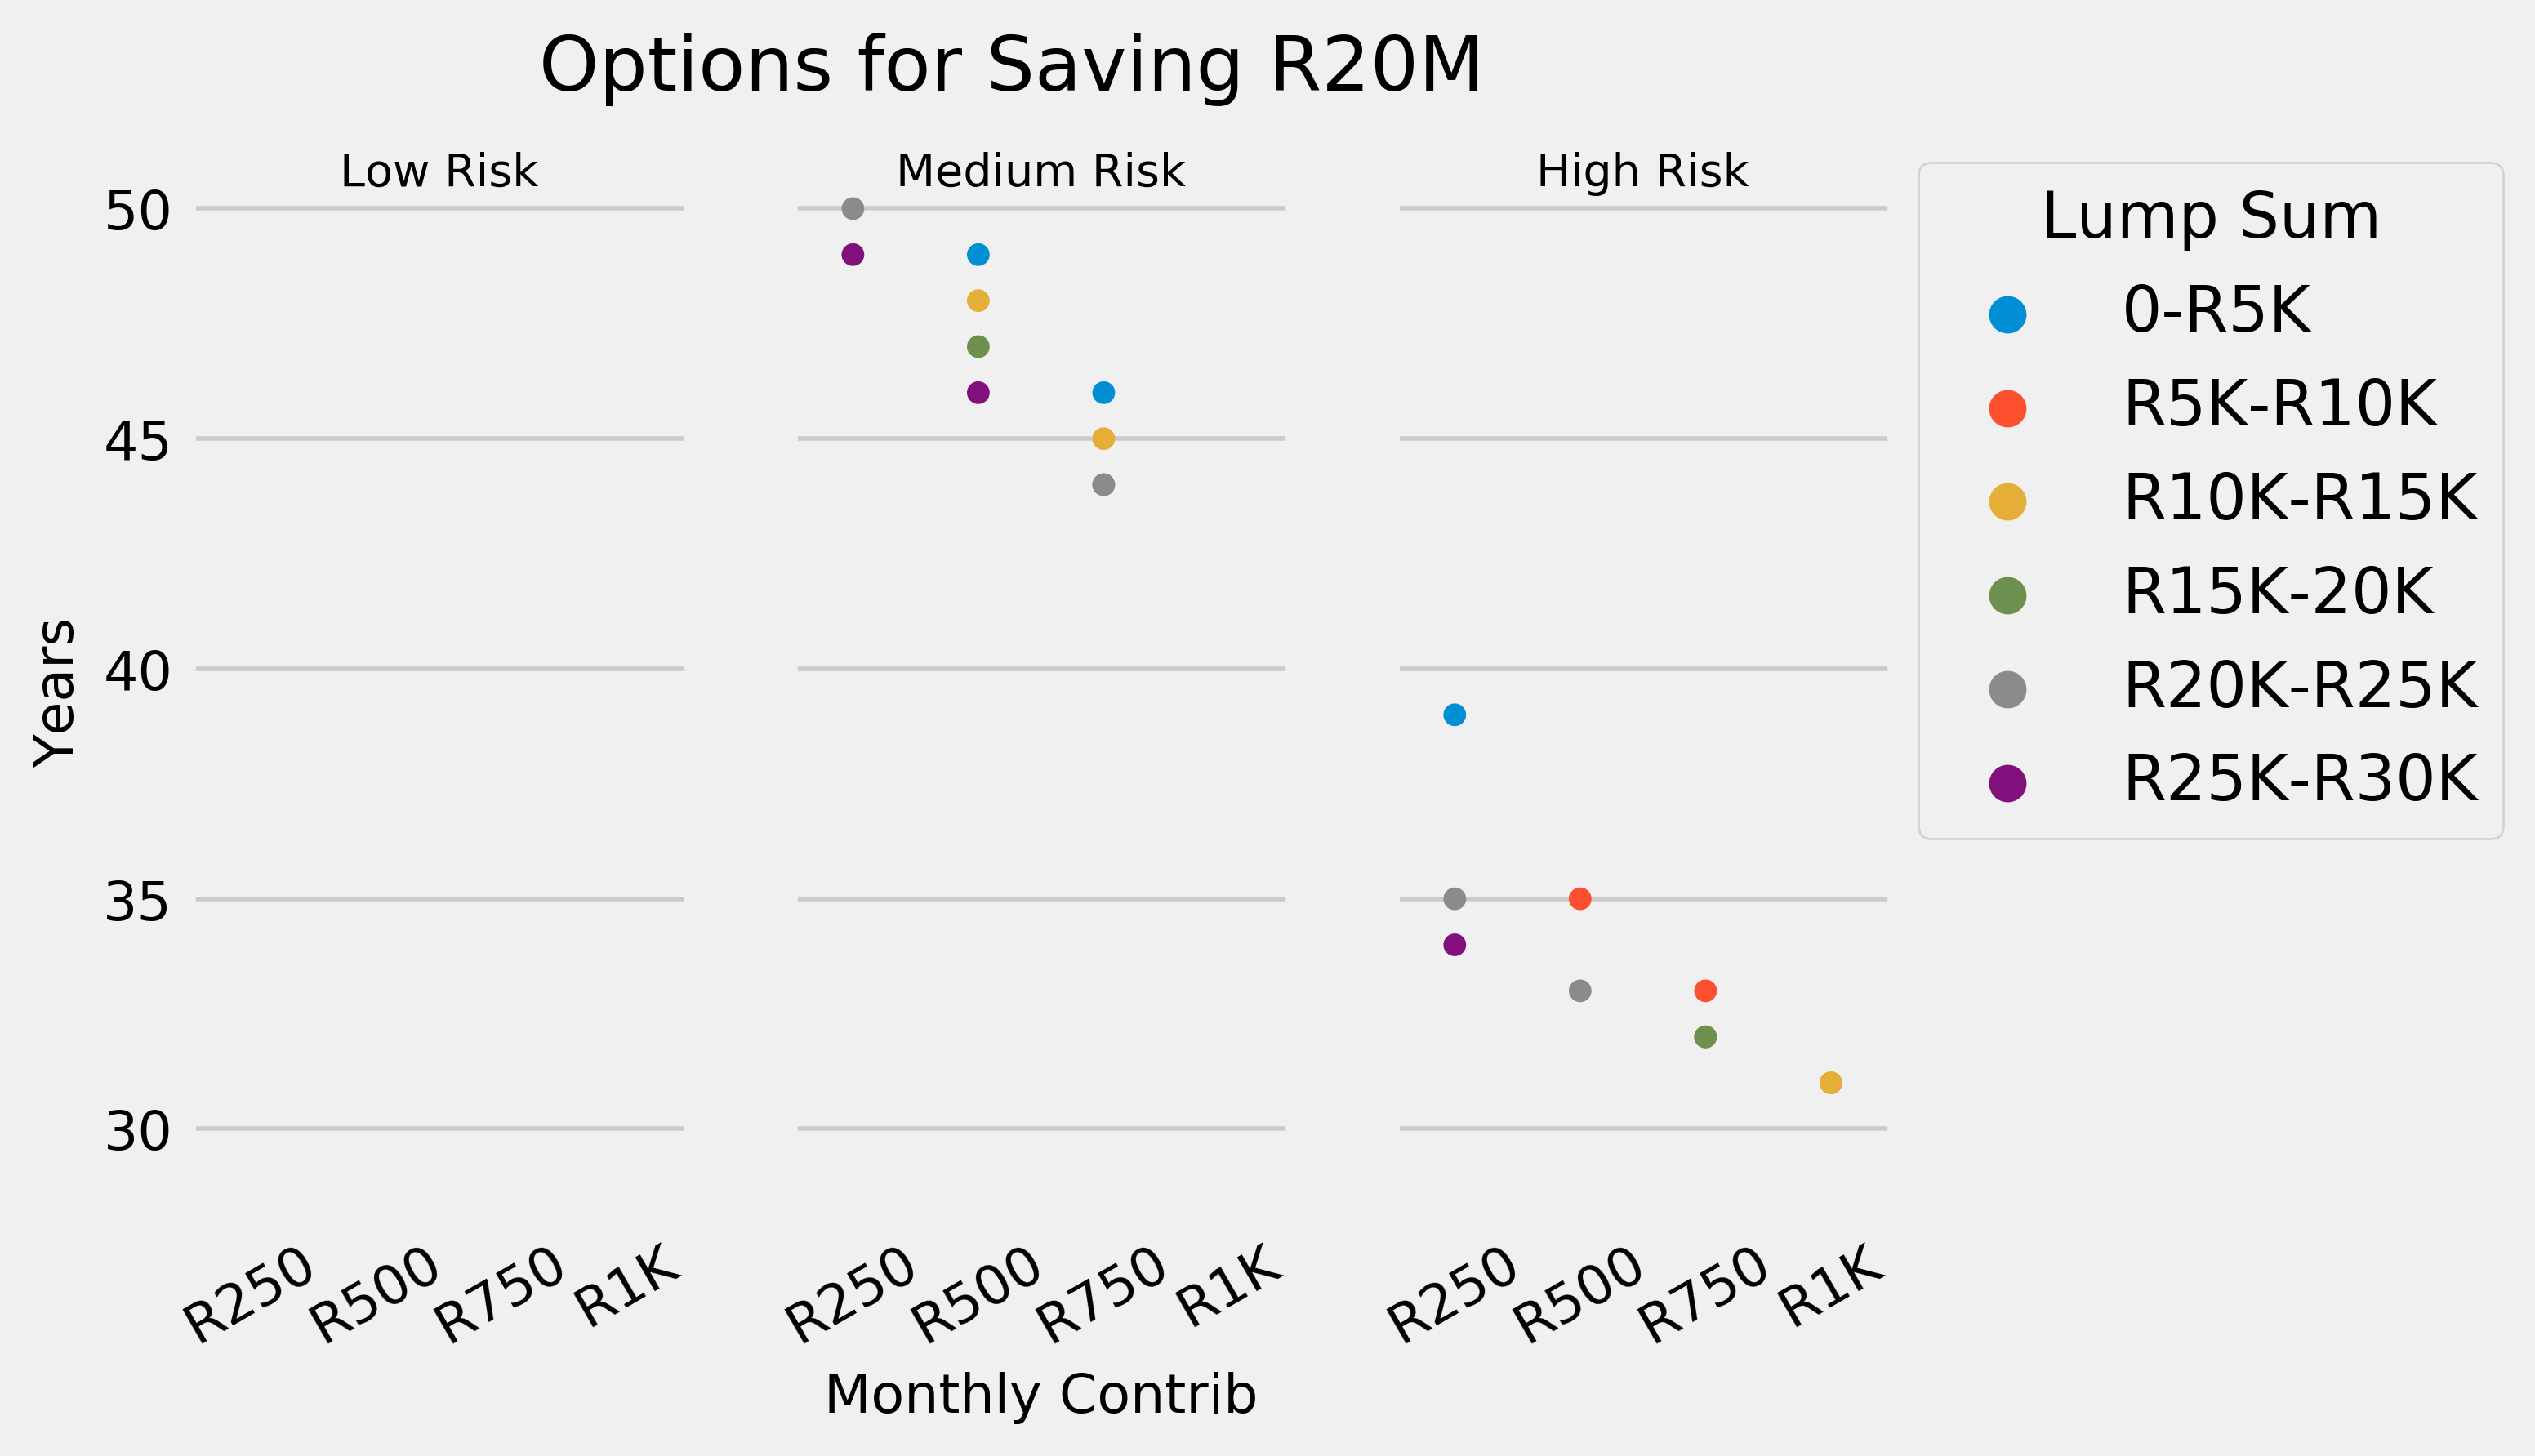

In [207]:
risks = ["low", "medium", "high"]
risk_labels = ["Low", "Medium", "High"]

fig, ax = plt.subplots(1, 3, dpi=400, sharey='row', sharex=True)
width, height = plt.figaspect(1.68)
fig.figsize = (width, height)
fig.subplots_adjust(hspace=0.4)

for ax, risk, risk_label in zip(ax.ravel(), risks, risk_labels):
    df = data[(data.risk==risk) & ((data.fv>=20000000) & (data.fv<=20100000)) & ((data.monthly==250) | (data.monthly==500) | (data.monthly==750) | (data.monthly==1000))]
    ax = sns.stripplot(x="monthly", y="horizon", hue="lump_sum_cat", data=df, ax=ax)
    
    if risk == "low":        
        ax.set_ylabel("Years", fontdict={"fontsize": 12})
    else:
        ax.set_ylabel("")
    
    if risk == "medium":
        ax.set_xlabel("Monthly Contrib", fontdict={"fontsize": 12})
    else:
        ax.set_xlabel("")
    ax.tick_params(axis="x", labelrotation=30)
    ax.set_xticklabels(labels=["R250", "R500", "R750", "R1K"])
    ax.set_ylim(28, 51)
    ax.set_title(risk_label + " Risk", pad=-5, fontdict={"fontsize": 10}) 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend().set_visible(False)
    

plt.suptitle("Options for Saving R20M")
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Lump Sum")

# Summary & Next Steps

Tax-free investments are a wonderful initiative that we should all be taking advantage of. However they are no panacea, nor are they a get-rich-quick scheme. Their beauty, like most investment products, lies in the waiting time of compound interest but with the added and substantial benefit of not having to pay any form of tax on your returns.

It's clear that making use of a tax-free investment product is a smart thing to do. It's also clear that how much you contribute into the fund per month, the amount of time you leave your money compounding and the risk category you choose, makes a substantial difference to your final investment amount. If you can afford to put a lump sum down, certainly do so, but it's the least important factor in the investment, so rather start saving as soon as possible as the time under investment is what matters most.

As mentioned in the initial assumptions, this analysis has some limitations and in future versions I'd like to do the following:

- Take any investment fees into account.
- Simulate adding additional lump sum amounts (for example, adding a 13th cheque or bonus into the fund).
- Simulate changing the monthly contribution at various points through the time horizon.
- Simulate the market going up and down, i.e. not getting the expected return on investment.
- Compare this with other investment options.

I hope this analysis has been useful. Please do let me know where it can be made clearer and ideas for how it can be extended.

You can download a pdf report of the visualisations [here](https://s3-eu-west-1.amazonaws.com/content.dorondusheiko.com/tax-free-investment-analysis-doron-dusheiko.pdf)